In [8]:
import pandas as pd
import numpy as np
import os
from sklearn import metrics
from glob import glob
from datetime import datetime
import time
import json

# Final models

In [ ]:
df = pd.read_excel('insert the path')      #"C:\\Users\\aless\\Desktop\\Unimib\\tesi\\sample_final.xlsx"

a=[]
for i in df['Valutatore 2']:
    if i==33.0:
        a.append(3.0)    
    else:
        a.append(i)
df['Valutatore 2'] =a
    
    
# extraction of the most frequent value, the median if all are different.
new_column = []
for i, row in df.iterrows():
    values = [row['Valutatore 1'], row['Valutatore 2'], row['Valutatore 3']]
    new_column.append(sorted(values)[1])


df['Final_Label'] = new_column
df


,Author,Full Text,Contiene foto o video?,Year,Valutatore 1,Valutatore 2,Valutatore 3,Final_Label,Word Count
0,grandekate,"This is very easy money, just inviting friends...",False,2019,3.0,3.0,3.0,3.0,13
1,levi97zzz,All aboard to 3k!!! 🚀🚀🚀,False,2021,3.0,3.0,3.0,3.0,5
2,aminok,A Democrat supporting technological openness a...,True,2023,2.0,2.0,2.0,2.0,13
3,Gringo4,Crypto markets today .. COMP 🚀,False,2020,2.0,2.0,2.0,2.0,6
4,No_Warthog_6864,Be selfless today community[removed],False,2023,3.0,3.0,3.0,3.0,4
...,...,...,...,...,...,...,...,...,...
5995,Suthekingg,"Crypto Anonymity Must End, States Top Russian ...",False,2022,NaN,3.0,NaN,3.0,8
5996,AutoModerator,"Daily General Discussion - December 19, 2023 (...",False,2023,NaN,3.0,NaN,3.0,155
5997,Gringo4,India’s Supreme court has the lifted the ban o...,False,2020,NaN,2.0,NaN,2.0,39
5998,frenchhoudini,Correction: GNT is not tradable on EtherDelta ...,False,2016,NaN,1.0,NaN,1.0,64


In [ ]:
file_zip = 'insert path'       #"C:\\Users\\aless\\Desktop\\reddit_distr\\posts"

os.chdir(file_zip)

print("Files estratti:")
print(os.listdir())
rewards=sorted(os.listdir())
rewards=rewards[9:]
rewards

Files estratti:
['r_ethtrader_comments_2016.jsonl', 'r_ethtrader_comments_2017.jsonl', 'r_ethtrader_comments_2018_bkp.jsonl', 'r_ethtrader_comments_2019.jsonl', 'r_ethtrader_comments_2020.jsonl', 'r_ethtrader_comments_2021.jsonl', 'r_ethtrader_comments_2022.jsonl', 'r_ethtrader_posts_2016.jsonl', 'r_ethtrader_posts_2017.jsonl', 'r_ethtrader_posts_2018.jsonl', 'r_ethtrader_posts_2019.jsonl', 'r_ethtrader_posts_2020.jsonl', 'r_ethtrader_posts_2021.jsonl', 'r_ethtrader_posts_2022.jsonl', 'r_ethtrader_posts_2023.jsonl']


['r_ethtrader_posts_2016.jsonl',
 'r_ethtrader_posts_2017.jsonl',
 'r_ethtrader_posts_2018.jsonl',
 'r_ethtrader_posts_2019.jsonl',
 'r_ethtrader_posts_2020.jsonl',
 'r_ethtrader_posts_2021.jsonl',
 'r_ethtrader_posts_2022.jsonl',
 'r_ethtrader_posts_2023.jsonl']

In [637]:
import json
all_data = pd.DataFrame()

for i in rewards:
  print(i)
  author=[]
  text=[]
  up_down=[]
  year=[]
  link_flair_text=[]
  num_comments=[]
  media=[]
  with open(i, 'r', encoding='UTF-8') as f:
      for line in f:
        line=json.loads(line)
        author.append(line['author'])
        all_text=line['title'] + line['selftext']
        text.append(all_text.replace('\n', ' '))
        up_down.append(line['ups'])
        link_flair_text.append(line['link_flair_text'] if 'link_flair_text' in line else None)
        num_comments.append(line['num_comments'] if 'num_comments' in line else None)
        media.append(line['media'] if 'media' in line else None)


        if '2016' in i:
          year.append('2016')
        elif '2017' in i:
          year.append('2017')
        elif '2018' in i:
          year.append('2018')
        elif '2019' in i:
          year.append('2019')
        elif '2020' in i:
          year.append('2020')
        elif '2021' in i:
          year.append('2021')
        elif '2022' in i:
          year.append('2022')
        elif '2023' in i:
          year.append('2023')


  data = pd.DataFrame({
      'Author': author,
      'Full Text': text,
      'Up-Down': up_down,
      'Year': year,
      'Num_Comments': num_comments,
      'Media': media,
      'link_flair_text': link_flair_text
  })
  all_data = pd.concat([all_data, data], ignore_index=True)

all_data=all_data[all_data['Author']!='[deleted]']
all_data

r_ethtrader_posts_2016.jsonl
r_ethtrader_posts_2017.jsonl
r_ethtrader_posts_2018.jsonl
r_ethtrader_posts_2019.jsonl
r_ethtrader_posts_2020.jsonl
r_ethtrader_posts_2021.jsonl
r_ethtrader_posts_2022.jsonl
r_ethtrader_posts_2023.jsonl


,Author,Full Text,Up-Down,Year,Num_Comments,Media,link_flair_text
0,carlslarson,How would a switch to Proof of Stake affect th...,10,2016,9,None,None
1,heliumcraft,Price predictions?What do you think will be th...,12,2016,27,None,None
2,StonedSheep,Exchange?Which exchanges will Ethereum first s...,5,2016,7,None,None
4,heliumcraft,What software do you use for trading?,3,2016,2,None,None
5,carlslarson,What factors will influence the price of Ether?,9,2016,11,None,None
...,...,...,...,...,...,...,...
365557,MasterpieceLoud4931,"In 2023, the US government tried to kill crypto",7,2023,1,None,News
365558,Prog132487,Biggest Crypto and NFT Games of 2023 - Decrypt,1,2023,1,None,None
365559,teeceaustralia,Vitalik Buterin Reveals Ethereum’s Road Map Fo...,7,2023,1,None,News
365560,aItalianStallion,"Chainlink News: CCIP, Data Feeds & Streams, Pr...",0,2023,1,{'oembed': {'author_name': 'Web3 Stories & New...,Media


In [ ]:
# adding to the samples, the different flair labels from the original data

all_data['Year']= all_data['Year'].astype(int)
df['Year']= df['Year'].astype(int)
all_data = all_data.drop_duplicates(subset=['Author', 'Full Text'])

merged_df = pd.merge(df, all_data, on=['Author', 'Full Text', 'Year'], how='left')
merged_df['Year']= merged_df['Full Text'].astype(str)

df['Word Count'] = df['Full Text'].apply(lambda x: len(str(x).split(' ')))
lista=["Other label or No label","Adoption","Altcoin","Announcement","Comedy","Dapp","Discussion","Educational","Exchange","Fundamentals","Media","Metrics","Mining-Staking","News","Security","Sentiment","Strategy","Support","Technicals","Tool","Trading","Warning"]
lista_lower = [label.lower() for label in lista]

merged_df['link_flair_text'] = merged_df['link_flair_text'].str.lower()

merged_df['link_flair_text'] = merged_df['link_flair_text'].apply(
    lambda x: x if x in lista_lower else 'no label'
)
hot_encoded_df = pd.get_dummies(merged_df['link_flair_text'], prefix='flair')
hot_encoded_df = hot_encoded_df.astype(int)

merged_df = pd.concat([merged_df, hot_encoded_df], axis=1)


merged_df


C:\Users\Castagna\AppData\Local\Temp\2\ipykernel_12932\1363572919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Year']= all_data['Year'].astype(int)


,Author,Full Text,Contiene foto o video?,Year,Valutatore 1,Valutatore 2,Valutatore 3,Final_Label,Word Count,Up-Down,...,flair_news,flair_no label,flair_security,flair_sentiment,flair_strategy,flair_support,flair_technicals,flair_tool,flair_trading,flair_warning
0,grandekate,"This is very easy money, just inviting friends...",False,"This is very easy money, just inviting friends...",3.0,3.0,3.0,3.0,13,1.0,...,0,0,0,0,0,0,1,0,0,0
1,levi97zzz,All aboard to 3k!!! 🚀🚀🚀,False,All aboard to 3k!!! 🚀🚀🚀,3.0,3.0,3.0,3.0,5,43.0,...,0,0,0,0,0,0,0,0,0,0
2,aminok,A Democrat supporting technological openness a...,True,A Democrat supporting technological openness a...,2.0,2.0,2.0,2.0,13,17.0,...,0,0,0,0,0,0,0,0,0,0
3,Gringo4,Crypto markets today .. COMP 🚀,False,Crypto markets today .. COMP 🚀,2.0,2.0,2.0,2.0,6,5.0,...,0,0,0,0,0,0,0,0,0,0
4,No_Warthog_6864,Be selfless today community[removed],False,Be selfless today community[removed],3.0,3.0,3.0,3.0,4,1.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Suthekingg,"Crypto Anonymity Must End, States Top Russian ...",False,"Crypto Anonymity Must End, States Top Russian ...",NaN,3.0,NaN,3.0,8,3.0,...,1,0,0,0,0,0,0,0,0,0
5996,AutoModerator,"Daily General Discussion - December 19, 2023 (...",False,"Daily General Discussion - December 19, 2023 (...",NaN,3.0,NaN,3.0,155,NaN,...,0,1,0,0,0,0,0,0,0,0
5997,Gringo4,India’s Supreme court has the lifted the ban o...,False,India’s Supreme court has the lifted the ban o...,NaN,2.0,NaN,2.0,39,326.0,...,0,0,0,0,0,0,0,0,0,0
5998,frenchhoudini,Correction: GNT is not tradable on EtherDelta ...,False,Correction: GNT is not tradable on EtherDelta ...,NaN,1.0,NaN,1.0,64,14.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import re
import emoji
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")

# Funzione per contare gli emoji
def count_emojis(text):
    return len([char for char in text if char in emoji.EMOJI_DATA])

# Funzione per contare i link
def count_links(text):
    if isinstance(text, str):
        url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        return len(url_pattern.findall(text))
    return 0

# Funzione per calcolare la lunghezza del testo (in caratteri)
def post_length(text):
    return len(text)

# Funzione per contare le parole nel testo (usando spaCy)
def word_count(text):
    doc = nlp(text)
    return len([token.text for token in doc if token.is_alpha])

# Funzione per contare le frasi nel testo (usando spaCy)
def sentence_count(text):
    doc = nlp(text)
    return len(list(doc.sents))

# Funzione per contare le sillabe (approccio semplificato)
def count_syllables(word):
    word = word.lower()
    vowels = "aeiouy"
    syllables = 0
    previous_char_was_vowel = False
    for char in word:
        if char in vowels:
            if not previous_char_was_vowel:
                syllables += 1
            previous_char_was_vowel = True
        else:
            previous_char_was_vowel = False
    return syllables

# Funzione per contare le sillabe nel testo
def syllable_count(text):
    doc = nlp(text)
    return sum([count_syllables(token.text) for token in doc if token.is_alpha])

# Funzione per contare le parole lunghe (7 o più lettere)
def long_word_count(text):
    doc = nlp(text)
    return len([token.text for token in doc if len(token.text) >= 7 and token.is_alpha])

# Funzione per calcolare la lunghezza media delle frasi
def avg_sentence_length(text):
    sentences = sentence_count(text)
    words = word_count(text)
    if sentences > 0:
        return words / sentences
    return 0

# Funzione per calcolare la media delle sillabe per parola
def avg_syllables_per_word(text):
    words = word_count(text)
    syllables = syllable_count(text)
    if words > 0:
        return syllables / words
    return 0

# Flesch Reading Ease
def reading_ease(text):
    asl = avg_sentence_length(text)
    asw = avg_syllables_per_word(text)
    return 206.835 - (1.015 * asl) - (84.6 * asw)

# Flesch-Kincaid Grade Level
def grade_level(text):
    asl = avg_sentence_length(text)
    asw = avg_syllables_per_word(text)
    return 0.39 * asl + 11.8 * asw - 15.59

def analyze_text(text):
    return {
        'emoji_count': count_emojis(text),
        'link_count': count_links(text),
        'post_length': post_length(text),
        'word_count': word_count(text),
        'sentence_count': sentence_count(text),
        'syllable_count': syllable_count(text),
        'avg_sentence_length': avg_sentence_length(text),
        'reading_ease': reading_ease(text),
        'grade_level': grade_level(text)
    }


primi = merged_df[:1000]
res = merged_df[:1000]['Full Text'].apply(analyze_text)

result_df = pd.DataFrame(res.tolist())
primi = pd.concat([primi, result_df], axis=1)

primi


,Author,Full Text,Contiene foto o video?,Year,Valutatore 1,Valutatore 2,Valutatore 3,Final_Label,Word Count,Up-Down,...,reading_ease,emoji_count,link_count,post_length,word_count,sentence_count,syllable_count,avg_sentence_length,reading_ease,grade_level
0,grandekate,"This is very easy money, just inviting friends...",False,"This is very easy money, just inviting friends...",3.0,3.0,3.0,3.0,13,1.0,...,102.532308,0,0,69,12,1,17,12.0,74.805000,5.806667
1,levi97zzz,All aboard to 3k!!! 🚀🚀🚀,False,All aboard to 3k!!! 🚀🚀🚀,3.0,3.0,3.0,3.0,5,43.0,...,136.617500,3,0,23,3,2,4,1.5,92.512500,0.728333
2,aminok,A Democrat supporting technological openness a...,True,A Democrat supporting technological openness a...,2.0,2.0,2.0,2.0,13,17.0,...,24.529808,0,0,95,13,2,30,6.5,5.006731,14.175769
3,Gringo4,Crypto markets today .. COMP 🚀,False,Crypto markets today .. COMP 🚀,2.0,2.0,2.0,2.0,6,5.0,...,105.090000,1,0,30,4,2,7,2.0,56.755000,5.840000
4,No_Warthog_6864,Be selfless today community[removed],False,Be selfless today community[removed],3.0,3.0,3.0,3.0,4,1.0,...,-8.725000,0,0,36,3,1,5,3.0,62.790000,5.246667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,drcopperfield,PANIC STATIONS[removed],False,PANIC STATIONS[removed],4.0,4.0,NaN,4.0,2,1.0,...,-48.995000,0,0,23,1,1,2,1.0,36.620000,8.400000
996,salil19,Rekt Bears,True,Rekt Bears,2.0,2.0,NaN,2.0,2,3.0,...,120.205000,0,0,10,2,1,2,2.0,120.205000,-3.010000
997,UNlSVVAP,UniDrop[removed],False,UniDrop[removed],4.0,4.0,NaN,4.0,1,1.0,...,36.620000,0,0,16,0,1,0,0.0,206.835000,-15.590000
998,holly9000,Does anyone know who did the Marketing/PR for ...,False,Does anyone know who did the Marketing/PR for ...,2.0,2.0,NaN,2.0,12,1.0,...,60.705000,0,0,77,12,1,18,12.0,67.755000,6.790000


In [ ]:
secondi = merged_df[1000:2000]
res = merged_df[1000:2000]['Full Text'].apply(analyze_text)

result_df = pd.DataFrame(res.tolist())
secondi = pd.concat([secondi, result_df], axis=1)

secondi

,Author,Full Text,Contiene foto o video?,Year,Valutatore 1,Valutatore 2,Valutatore 3,Final_Label,Word Count,Up-Down,...,reading_ease,emoji_count,link_count,post_length,word_count,sentence_count,syllable_count,avg_sentence_length,reading_ease,grade_level
1000,hafsa1234,Get updates about Bitcoin expeditiously from a...,False,Get updates about Bitcoin expeditiously from a...,NaN,3.0,3.0,3.0,28.0,3.0,...,53.639286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,Solodeji,Vitalik Buterin Sends $1 Million in ETH to Coi...,False,Vitalik Buterin Sends $1 Million in ETH to Coi...,NaN,2.0,2.0,2.0,11.0,1.0,...,49.542727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,fishcalledbob,Coinbase says 'just no way' to register with S...,False,Coinbase says 'just no way' to register with S...,NaN,2.0,3.0,2.0,13.0,3.0,...,76.501538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,neoftw,When will ETH go back to 1000$[removed],False,When will ETH go back to 1000$[removed],NaN,4.0,2.0,2.0,7.0,1.0,...,103.044286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,EthTraderCommunity,"ApolloX completes new funding round, gets hack...",False,"ApolloX completes new funding round, gets hack...",NaN,2.0,2.0,2.0,11.0,1.0,...,80.306364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,75.0,11.0,2.0,21.0,5.500000,39.743409,9.082273
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,8.0,1.0,2.0,1.0,0.500000,121.727500,-3.595000
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,766.0,143.0,7.0,226.0,20.428571,52.396503,11.026094
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,37.0,2.0,1.0,7.0,2.000000,-91.295000,26.490000


In [ ]:
secondi_destra = secondi[['emoji_count', 'link_count', 'post_length', 'word_count', 
                          'sentence_count', 'syllable_count', 'avg_sentence_length', 
                          'reading_ease', 'grade_level']]
secondi_sinistra = secondi.drop(columns=['emoji_count', 'link_count', 'post_length', 
                                        'word_count', 'sentence_count', 'syllable_count', 
                                        'avg_sentence_length', 'reading_ease', 'grade_level'])

secondi_destra = secondi_destra[1000:]
secondi_sinistra = secondi_sinistra[:1000]
secondi_destra = secondi_destra.reset_index(drop=True)
secondi_sinistra = secondi_sinistra.reset_index(drop=True)
secondi_uniti = pd.concat([secondi_sinistra, secondi_destra], axis=1)
secondi_uniti


,Author,Full Text,Contiene foto o video?,Year,Valutatore 1,Valutatore 2,Valutatore 3,Final_Label,Word Count,Up-Down,...,word_count,sentence_count,sentence_count,syllable_count,syllable_count,avg_sentence_length,avg_sentence_length,reading_ease,reading_ease,grade_level
0,hafsa1234,Get updates about Bitcoin expeditiously from a...,False,Get updates about Bitcoin expeditiously from a...,NaN,3.0,3.0,3.0,28.0,3.0,...,27.0,NaN,2.0,NaN,52.0,NaN,13.500000,NaN,30.199167,12.400926
1,Solodeji,Vitalik Buterin Sends $1 Million in ETH to Coi...,False,Vitalik Buterin Sends $1 Million in ETH to Coi...,NaN,2.0,2.0,2.0,11.0,1.0,...,10.0,NaN,1.0,NaN,20.0,NaN,10.000000,NaN,27.485000,11.910000
2,fishcalledbob,Coinbase says 'just no way' to register with S...,False,Coinbase says 'just no way' to register with S...,NaN,2.0,3.0,2.0,13.0,3.0,...,13.0,NaN,1.0,NaN,20.0,NaN,13.000000,NaN,63.486154,7.633846
3,neoftw,When will ETH go back to 1000$[removed],False,When will ETH go back to 1000$[removed],NaN,4.0,2.0,2.0,7.0,1.0,...,6.0,NaN,1.0,NaN,6.0,NaN,6.000000,NaN,116.145000,-1.450000
4,EthTraderCommunity,"ApolloX completes new funding round, gets hack...",False,"ApolloX completes new funding round, gets hack...",NaN,2.0,2.0,2.0,11.0,1.0,...,11.0,NaN,1.0,NaN,17.0,NaN,11.000000,NaN,64.924545,6.936364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,thechosenoneesuji,Yahoo Finance Poll : How would you maximize fi...,False,Yahoo Finance Poll : How would you maximize fi...,3.0,NaN,NaN,3.0,12.0,171.0,...,11.0,NaN,2.0,NaN,21.0,NaN,5.500000,NaN,39.743409,9.082273
996,shittyshittymorph,HODL!! 🚀,False,HODL!! 🚀,3.0,NaN,NaN,3.0,2.0,1.0,...,1.0,NaN,2.0,NaN,1.0,NaN,0.500000,NaN,121.727500,-3.595000
997,Killerjayko,"Mining Ethereum?Hi guys, i've recently been ge...",False,"Mining Ethereum?Hi guys, i've recently been ge...",3.0,NaN,NaN,3.0,141.0,4.0,...,143.0,NaN,7.0,NaN,226.0,NaN,20.428571,NaN,52.396503,11.026094
998,charlottenr1,Investing additional 30.000€[removed],False,Investing additional 30.000€[removed],3.0,NaN,NaN,3.0,3.0,1.0,...,2.0,NaN,1.0,NaN,7.0,NaN,2.000000,NaN,-91.295000,26.490000


In [ ]:
tre = merged_df[2000:3000]
res = merged_df[2000:3000]['Full Text'].apply(analyze_text)

result_df = pd.DataFrame(res.tolist())
tre = pd.concat([tre, result_df], axis=1)

tre

,Author,Full Text,Contiene foto o video?,Year,Valutatore 1,Valutatore 2,Valutatore 3,Final_Label,Word Count,Up-Down,...,reading_ease,emoji_count,link_count,post_length,word_count,sentence_count,syllable_count,avg_sentence_length,reading_ease,grade_level
2000,Easy-Soup140,BitBoy removed from his company amid corporate...,False,BitBoy removed from his company amid corporate...,2.0,2.0,1.0,2.0,8.0,17.0,...,50.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,serenity2021,Ethereum 2.0 Testnet When???,False,Ethereum 2.0 Testnet When???,3.0,2.0,3.0,3.0,4.0,1.0,...,97.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,stockartiste,"I reversed that ""mountains look like prices"" m...",False,"I reversed that ""mountains look like prices"" m...",1.0,2.0,2.0,2.0,15.0,15.0,...,101.370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,nugget_alex,FED Announce QE Infinity,False,FED Announce QE Infinity,1.0,1.0,1.0,1.0,4.0,16.0,...,33.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,kwsyeah,Tron Breaks Out to the Top,False,Tron Breaks Out to the Top,2.0,1.0,2.0,2.0,6.0,1.0,...,116.145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,1031.0,194.0,11.0,303.0,17.636364,56.801101,9.718079
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,121.0,21.0,2.0,25.0,10.500000,95.463214,2.552619
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,91.0,12.0,1.0,20.0,12.000000,53.655000,8.756667
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,106.0,15.0,1.0,32.0,15.000000,11.130000,15.433333


In [ ]:
quattro_destra = tre[['emoji_count', 'link_count', 'post_length', 'word_count', 
                          'sentence_count', 'syllable_count', 'avg_sentence_length', 
                          'reading_ease', 'grade_level']]
quattro_sinistra = tre.drop(columns=['emoji_count', 'link_count', 'post_length', 
                                        'word_count', 'sentence_count', 'syllable_count', 
                                        'avg_sentence_length', 'reading_ease', 'grade_level'])

quattro_destra = quattro_destra[1000:]
quattro_sinistra = quattro_sinistra[:1000]
quattro_destra = quattro_destra.reset_index(drop=True)
quattro_sinistra = quattro_sinistra.reset_index(drop=True)
tre_uniti = pd.concat([quattro_sinistra, quattro_destra], axis=1)
tre_uniti


,Author,Full Text,Contiene foto o video?,Year,Valutatore 1,Valutatore 2,Valutatore 3,Final_Label,Word Count,Up-Down,...,word_count,sentence_count,sentence_count,syllable_count,syllable_count,avg_sentence_length,avg_sentence_length,reading_ease,reading_ease,grade_level
0,Easy-Soup140,BitBoy removed from his company amid corporate...,False,BitBoy removed from his company amid corporate...,2.0,2.0,1.0,2.0,8.0,17.0,...,8.0,NaN,1.0,NaN,17.0,NaN,8.000000,NaN,18.940000,12.605000
1,serenity2021,Ethereum 2.0 Testnet When???,False,Ethereum 2.0 Testnet When???,3.0,2.0,3.0,3.0,4.0,1.0,...,3.0,NaN,1.0,NaN,6.0,NaN,3.000000,NaN,34.590000,9.180000
2,stockartiste,"I reversed that ""mountains look like prices"" m...",False,"I reversed that ""mountains look like prices"" m...",1.0,2.0,2.0,2.0,15.0,15.0,...,13.0,NaN,1.0,NaN,22.0,NaN,13.000000,NaN,50.470769,9.449231
3,nugget_alex,FED Announce QE Infinity,False,FED Announce QE Infinity,1.0,1.0,1.0,1.0,4.0,16.0,...,4.0,NaN,1.0,NaN,9.0,NaN,4.000000,NaN,12.425000,12.520000
4,kwsyeah,Tron Breaks Out to the Top,False,Tron Breaks Out to the Top,2.0,1.0,2.0,2.0,6.0,1.0,...,6.0,NaN,1.0,NaN,6.0,NaN,6.000000,NaN,116.145000,-1.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,freimiller,Orion Protocol Will Be Very Useful To The Indu...,False,Orion Protocol Will Be Very Useful To The Indu...,1.0,2.0,2.0,2.0,195.0,1.0,...,194.0,NaN,11.0,NaN,303.0,NaN,17.636364,NaN,56.801101,9.718079
996,Agric_brodar,P2E is the new Buzz that's why i am not sleepi...,False,P2E is the new Buzz that's why i am not sleepi...,2.0,3.0,2.0,2.0,23.0,1.0,...,21.0,NaN,2.0,NaN,25.0,NaN,10.500000,NaN,95.463214,2.552619
997,zantho,"Hey 9005ers (aka, presalers), what have you (m...",False,"Hey 9005ers (aka, presalers), what have you (m...",2.0,3.0,2.0,2.0,14.0,1.0,...,12.0,NaN,1.0,NaN,20.0,NaN,12.000000,NaN,53.655000,8.756667
998,EthTraderCommunity,Three Under-the-Radar Ethereum-Based Cryptos A...,False,Three Under-the-Radar Ethereum-Based Cryptos A...,1.0,1.0,2.0,1.0,12.0,2.0,...,15.0,NaN,1.0,NaN,32.0,NaN,15.000000,NaN,11.130000,15.433333


In [ ]:
quattro = merged_df[3000:4000]
res = merged_df[3000:4000]['Full Text'].apply(analyze_text)

result_df = pd.DataFrame(res.tolist())
quattro = pd.concat([quattro, result_df], axis=1)

quattro

,Author,Full Text,Contiene foto o video?,Year,Valutatore 1,Valutatore 2,Valutatore 3,Final_Label,Word Count,Up-Down,...,reading_ease,emoji_count,link_count,post_length,word_count,sentence_count,syllable_count,avg_sentence_length,reading_ease,grade_level
3000,ShrimpyKevin,KuCoin Partners with Shrimpy to Simplify Portf...,False,KuCoin Partners with Shrimpy to Simplify Portf...,3.0,3.0,3.0,3.0,8.0,6.0,...,29.515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3001,eltroog,Never expected to see this happen this year,False,Never expected to see this happen this year,3.0,3.0,3.0,3.0,8.0,32.0,...,71.815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3002,EthTraderCommunity,Oracles’ Functionality on the Horizon Ecosystem,False,Oracles’ Functionality on the Horizon Ecosystem,2.0,2.0,2.0,2.0,6.0,1.0,...,3.345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3003,Suthekingg,"Robinhood posts $423 million net loss, shares ...",False,"Robinhood posts $423 million net loss, shares ...",2.0,2.0,2.0,2.0,10.0,14.0,...,86.705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3004,EthTraderCommunity,Coinbase to acquire crypto custody technology ...,False,Coinbase to acquire crypto custody technology ...,2.0,2.0,2.0,2.0,9.0,2.0,...,9.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,22.0,4.0,1.0,6.0,4.0,75.875000,3.670000
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,75.0,13.0,1.0,22.0,13.0,50.470769,9.449231
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,58.0,9.0,1.0,16.0,9.0,47.300000,8.897778
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,24.0,4.0,1.0,7.0,4.0,54.725000,6.620000


In [ ]:
quattro_destra = quattro[['emoji_count', 'link_count', 'post_length', 'word_count', 
                          'sentence_count', 'syllable_count', 'avg_sentence_length', 
                          'reading_ease', 'grade_level']]
quattro_sinistra = quattro.drop(columns=['emoji_count', 'link_count', 'post_length', 
                                        'word_count', 'sentence_count', 'syllable_count', 
                                        'avg_sentence_length', 'reading_ease', 'grade_level'])

quattro_destra = quattro_destra[1000:]
quattro_sinistra = quattro_sinistra[:1000]
quattro_destra = quattro_destra.reset_index(drop=True)
quattro_sinistra = quattro_sinistra.reset_index(drop=True)
quattro_uniti = pd.concat([quattro_sinistra, quattro_destra], axis=1)
quattro_uniti


,Author,Full Text,Contiene foto o video?,Year,Valutatore 1,Valutatore 2,Valutatore 3,Final_Label,Word Count,Up-Down,...,word_count,sentence_count,sentence_count,syllable_count,syllable_count,avg_sentence_length,avg_sentence_length,reading_ease,reading_ease,grade_level
0,ShrimpyKevin,KuCoin Partners with Shrimpy to Simplify Portf...,False,KuCoin Partners with Shrimpy to Simplify Portf...,3.0,3.0,3.0,3.0,8.0,6.0,...,8.0,NaN,1.0,NaN,18.0,NaN,8.0,NaN,8.365000,14.080000
1,eltroog,Never expected to see this happen this year,False,Never expected to see this happen this year,3.0,3.0,3.0,3.0,8.0,32.0,...,8.0,NaN,1.0,NaN,12.0,NaN,8.0,NaN,71.815000,5.230000
2,EthTraderCommunity,Oracles’ Functionality on the Horizon Ecosystem,False,Oracles’ Functionality on the Horizon Ecosystem,2.0,2.0,2.0,2.0,6.0,1.0,...,6.0,NaN,1.0,NaN,17.0,NaN,6.0,NaN,-38.955000,20.183333
3,Suthekingg,"Robinhood posts $423 million net loss, shares ...",False,"Robinhood posts $423 million net loss, shares ...",2.0,2.0,2.0,2.0,10.0,14.0,...,9.0,NaN,1.0,NaN,14.0,NaN,9.0,NaN,66.100000,6.275556
4,EthTraderCommunity,Coinbase to acquire crypto custody technology ...,False,Coinbase to acquire crypto custody technology ...,2.0,2.0,2.0,2.0,9.0,2.0,...,9.0,NaN,1.0,NaN,23.0,NaN,9.0,NaN,-18.500000,18.075556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,indetronable,Let the people trade !,False,Let the people trade !,3.0,3.0,NaN,3.0,5.0,94.0,...,4.0,NaN,1.0,NaN,6.0,NaN,4.0,NaN,75.875000,3.670000
996,MicThess,Ethereum Adoption Reaches New Peak as Retail T...,False,Ethereum Adoption Reaches New Peak as Retail T...,2.0,2.0,NaN,2.0,13.0,4.0,...,13.0,NaN,1.0,NaN,22.0,NaN,13.0,NaN,50.470769,9.449231
997,AutomaticBlood6,"Wow, MATIC NETWORK Ethereum Session Public Sal...",False,"Wow, MATIC NETWORK Ethereum Session Public Sal...",2.0,2.0,NaN,2.0,9.0,1.0,...,9.0,NaN,1.0,NaN,16.0,NaN,9.0,NaN,47.300000,8.897778
998,3eyedravens,Poloniex on the hardfork,False,Poloniex on the hardfork,3.0,3.0,NaN,3.0,4.0,11.0,...,4.0,NaN,1.0,NaN,7.0,NaN,4.0,NaN,54.725000,6.620000


In [ ]:
cinque = merged_df[4000:5000]
res = merged_df[4000:5000]['Full Text'].astype(str).apply(analyze_text)

result_df = pd.DataFrame(res.tolist())
cinque = pd.concat([cinque, result_df], axis=1)

cinque

,Author,Full Text,Contiene foto o video?,Year,Valutatore 1,Valutatore 2,Valutatore 3,Final_Label,Word Count,Up-Down,...,reading_ease,emoji_count,link_count,post_length,word_count,sentence_count,syllable_count,avg_sentence_length,reading_ease,grade_level
4000,EthTraderCommunity,Solana price analysis: SOL loses momentum at $...,False,Solana price analysis: SOL loses momentum at $...,1.0,2.0,NaN,1.0,12.0,1.0,...,67.755000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4001,4tunec00kie,A $100 Million CFTC-Registered Fund Makes Long...,False,A $100 Million CFTC-Registered Fund Makes Long...,1.0,2.0,NaN,1.0,10.0,1.0,...,86.705000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4002,Zozocoin,Ethereum to set new bottom record.[removed],False,Ethereum to set new bottom record.[removed],2.0,2.0,NaN,2.0,6.0,1.0,...,87.945000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4003,EthTraderCommunity,Bitcoin and Ethereum Price Analysis,False,Bitcoin and Ethereum Price Analysis,2.0,3.0,NaN,2.0,5.0,1.0,...,66.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,Johnvt7,What happened to the deposit and withdraw opti...,False,What happened to the deposit and withdraw opti...,2.0,2.0,NaN,2.0,117.0,2.0,...,77.047984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,33.0,4.0,1.0,5.0,4.0,97.025,0.720000
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,71.0,12.0,3.0,19.0,4.0,68.825,4.653333
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,17.0,2.0,1.0,3.0,2.0,77.905,2.890000
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,182.0,24.0,1.0,53.0,24.0,-4.350,19.828333


In [ ]:
cinque_destra = cinque[['emoji_count', 'link_count', 'post_length', 'word_count', 
                          'sentence_count', 'syllable_count', 'avg_sentence_length', 
                          'reading_ease', 'grade_level']]
cinque_sinistra = cinque.drop(columns=['emoji_count', 'link_count', 'post_length', 
                                        'word_count', 'sentence_count', 'syllable_count', 
                                        'avg_sentence_length', 'reading_ease', 'grade_level'])

cinque_destra = cinque_destra[1000:]
cinque_sinistra = cinque_sinistra[:1000]
cinque_destra = cinque_destra.reset_index(drop=True)
cinque_sinistra = cinque_sinistra.reset_index(drop=True)
cinque_uniti = pd.concat([cinque_sinistra, cinque_destra], axis=1)
cinque_uniti


,Author,Full Text,Contiene foto o video?,Year,Valutatore 1,Valutatore 2,Valutatore 3,Final_Label,Word Count,Up-Down,...,word_count,sentence_count,sentence_count,syllable_count,syllable_count,avg_sentence_length,avg_sentence_length,reading_ease,reading_ease,grade_level
0,EthTraderCommunity,Solana price analysis: SOL loses momentum at $...,False,Solana price analysis: SOL loses momentum at $...,1.0,2.0,NaN,1.0,12.0,1.0,...,11.0,NaN,1.0,NaN,22.0,NaN,11.000000,NaN,26.470000,12.300000
1,4tunec00kie,A $100 Million CFTC-Registered Fund Makes Long...,False,A $100 Million CFTC-Registered Fund Makes Long...,1.0,2.0,NaN,1.0,10.0,1.0,...,11.0,NaN,1.0,NaN,17.0,NaN,11.000000,NaN,64.924545,6.936364
2,Zozocoin,Ethereum to set new bottom record.[removed],False,Ethereum to set new bottom record.[removed],2.0,2.0,NaN,2.0,6.0,1.0,...,5.0,NaN,1.0,NaN,8.0,NaN,5.000000,NaN,66.400000,5.240000
3,EthTraderCommunity,Bitcoin and Ethereum Price Analysis,False,Bitcoin and Ethereum Price Analysis,2.0,3.0,NaN,2.0,5.0,1.0,...,5.0,NaN,1.0,NaN,12.0,NaN,5.000000,NaN,-1.280000,14.680000
4,Johnvt7,What happened to the deposit and withdraw opti...,False,What happened to the deposit and withdraw opti...,2.0,2.0,NaN,2.0,117.0,2.0,...,113.0,NaN,11.0,NaN,175.0,NaN,10.272727,NaN,65.390483,6.690700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Prize_Stress_4859,Pump and Dump Donuts :-([removed],False,Pump and Dump Donuts :-([removed],3.0,3.0,NaN,3.0,5.0,1.0,...,4.0,NaN,1.0,NaN,5.0,NaN,4.000000,NaN,97.025000,0.720000
996,SacredHam00,Bitcoin Vs. Ethereum: TIME’s “Prince of Crypto...,False,Bitcoin Vs. Ethereum: TIME’s “Prince of Crypto...,2.0,2.0,NaN,2.0,12.0,1.0,...,12.0,NaN,3.0,NaN,19.0,NaN,4.000000,NaN,68.825000,4.653333
997,MrTechTips5,1080ti mining rig,False,1080ti mining rig,3.0,3.0,NaN,3.0,3.0,1.0,...,2.0,NaN,1.0,NaN,3.0,NaN,2.000000,NaN,77.905000,2.890000
998,elizapetrovska,A Look-Back at Berlin Blockchain Week - Intero...,False,A Look-Back at Berlin Blockchain Week - Intero...,NaN,2.0,NaN,2.0,24.0,1.0,...,24.0,NaN,1.0,NaN,53.0,NaN,24.000000,NaN,-4.350000,19.828333


In [ ]:
sei = merged_df[5000:]
res = merged_df[5000:]['Full Text'].apply(analyze_text)

result_df = pd.DataFrame(res.tolist())
sei = pd.concat([sei, result_df], axis=1)

sei

,Author,Full Text,Contiene foto o video?,Year,Valutatore 1,Valutatore 2,Valutatore 3,Final_Label,Word Count,Up-Down,...,reading_ease,emoji_count,link_count,post_length,word_count,sentence_count,syllable_count,avg_sentence_length,reading_ease,grade_level
5000,gattacibus,ETH withdrawal suspended on Poloniex for three...,False,ETH withdrawal suspended on Poloniex for three...,NaN,1.0,NaN,1.0,13.0,10.0,...,76.501538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5001,Dao-Jones,A fork of Decentraland is forming.The Decentra...,False,A fork of Decentraland is forming.The Decentra...,NaN,3.0,NaN,3.0,14.0,NaN,...,-51.701667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5002,dak91,EthereumWisdom.com now offers price candlestic...,False,EthereumWisdom.com now offers price candlestic...,NaN,3.0,NaN,3.0,6.0,9.0,...,45.645000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5003,AutoModerator,"Daily Altcoin Discussion - July 24, 2018Welcom...",False,"Daily Altcoin Discussion - July 24, 2018Welcom...",NaN,3.0,NaN,3.0,110.0,NaN,...,55.388587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5004,schism1,POLL: Which cryptocurrency would you like us t...,False,POLL: Which cryptocurrency would you like us t...,NaN,3.0,NaN,3.0,87.0,NaN,...,60.445455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,57.0,8.0,1.0,19.0,8.000000,-2.210000,15.555000
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,7.0,1528.0,166.0,19.0,320.0,8.736842,34.882768,10.564356
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,237.0,38.0,3.0,66.0,12.666667,47.041491,9.844737
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,414.0,63.0,3.0,112.0,21.000000,35.120000,13.577778


In [ ]:
sei_destra = sei[['emoji_count', 'link_count', 'post_length', 'word_count', 
                          'sentence_count', 'syllable_count', 'avg_sentence_length', 
                          'reading_ease', 'grade_level']]
sei_sinistra = sei.drop(columns=['emoji_count', 'link_count', 'post_length', 
                                        'word_count', 'sentence_count', 'syllable_count', 
                                        'avg_sentence_length', 'reading_ease', 'grade_level'])


sei_destra = sei_destra[1000:]
sei_sinistra = sei_sinistra[:1000]
sei_destra = sei_destra.reset_index(drop=True)
sei_sinistra = sei_sinistra.reset_index(drop=True)
sei_uniti = pd.concat([sei_sinistra, sei_destra], axis=1)
sei_uniti


,Author,Full Text,Contiene foto o video?,Year,Valutatore 1,Valutatore 2,Valutatore 3,Final_Label,Word Count,Up-Down,...,word_count,sentence_count,sentence_count,syllable_count,syllable_count,avg_sentence_length,avg_sentence_length,reading_ease,reading_ease,grade_level
0,gattacibus,ETH withdrawal suspended on Poloniex for three...,False,ETH withdrawal suspended on Poloniex for three...,NaN,1.0,NaN,1.0,13.0,10.0,...,12.0,NaN,1.0,NaN,22.0,NaN,12.000000,NaN,39.555000,10.723333
1,Dao-Jones,A fork of Decentraland is forming.The Decentra...,False,A fork of Decentraland is forming.The Decentra...,NaN,3.0,NaN,3.0,14.0,NaN,...,14.0,NaN,3.0,NaN,28.0,NaN,4.666667,NaN,32.898333,9.830000
2,dak91,EthereumWisdom.com now offers price candlestic...,False,EthereumWisdom.com now offers price candlestic...,NaN,3.0,NaN,3.0,6.0,9.0,...,5.0,NaN,1.0,NaN,9.0,NaN,5.000000,NaN,49.480000,7.600000
3,AutoModerator,"Daily Altcoin Discussion - July 24, 2018Welcom...",False,"Daily Altcoin Discussion - July 24, 2018Welcom...",NaN,3.0,NaN,3.0,110.0,NaN,...,111.0,NaN,10.0,NaN,206.0,NaN,11.100000,NaN,38.563095,10.638099
4,schism1,POLL: Which cryptocurrency would you like us t...,False,POLL: Which cryptocurrency would you like us t...,NaN,3.0,NaN,3.0,87.0,NaN,...,83.0,NaN,7.0,NaN,134.0,NaN,11.857143,NaN,58.216867,8.084888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Suthekingg,"Crypto Anonymity Must End, States Top Russian ...",False,"Crypto Anonymity Must End, States Top Russian ...",NaN,3.0,NaN,3.0,8.0,3.0,...,8.0,NaN,1.0,NaN,19.0,NaN,8.000000,NaN,-2.210000,15.555000
996,AutoModerator,"Daily General Discussion - December 19, 2023 (...",False,"Daily General Discussion - December 19, 2023 (...",NaN,3.0,NaN,3.0,155.0,NaN,...,166.0,NaN,19.0,NaN,320.0,NaN,8.736842,NaN,34.882768,10.564356
997,Gringo4,India’s Supreme court has the lifted the ban o...,False,India’s Supreme court has the lifted the ban o...,NaN,2.0,NaN,2.0,39.0,326.0,...,38.0,NaN,3.0,NaN,66.0,NaN,12.666667,NaN,47.041491,9.844737
998,frenchhoudini,Correction: GNT is not tradable on EtherDelta ...,False,Correction: GNT is not tradable on EtherDelta ...,NaN,1.0,NaN,1.0,64.0,14.0,...,63.0,NaN,3.0,NaN,112.0,NaN,21.000000,NaN,35.120000,13.577778


In [247]:
primi_reset = primi.reset_index(drop=True)
secondi_uniti_reset = secondi_uniti.reset_index(drop=True)
tre_uniti_reset = tre_uniti.reset_index(drop=True)
quattro_uniti_reset= quattro_uniti.reset_index(drop=True)
cinque_uniti_reset= cinque_uniti.reset_index(drop=True)
sei_uniti_reset = sei_uniti.reset_index(drop=True)

In [253]:
all_merged = pd.concat([primi_reset, secondi_uniti_reset, tre_uniti_reset, quattro_uniti_reset, cinque_uniti_reset, sei_uniti_reset], axis=0, ignore_index=True)
all_merged

,Author,Full Text,Contiene foto o video?,Year,Valutatore 1,Valutatore 2,Valutatore 3,Final_Label,Word Count,Up-Down,...,emoji_count,link_count,post_length,word_count,sentence_count,syllable_count,avg_sentence_length,reading_ease,grade_level,index
0,grandekate,"This is very easy money, just inviting friends...",False,"This is very easy money, just inviting friends...",3.0,3.0,3.0,3.0,13.0,1.0,...,0.0,0.0,69.0,12.0,1.0,17.0,12.000000,74.805000,5.806667,NaN
1,levi97zzz,All aboard to 3k!!! 🚀🚀🚀,False,All aboard to 3k!!! 🚀🚀🚀,3.0,3.0,3.0,3.0,5.0,43.0,...,3.0,0.0,23.0,3.0,2.0,4.0,1.500000,92.512500,0.728333,NaN
2,aminok,A Democrat supporting technological openness a...,True,A Democrat supporting technological openness a...,2.0,2.0,2.0,2.0,13.0,17.0,...,0.0,0.0,95.0,13.0,2.0,30.0,6.500000,5.006731,14.175769,NaN
3,Gringo4,Crypto markets today .. COMP 🚀,False,Crypto markets today .. COMP 🚀,2.0,2.0,2.0,2.0,6.0,5.0,...,1.0,0.0,30.0,4.0,2.0,7.0,2.000000,56.755000,5.840000,NaN
4,No_Warthog_6864,Be selfless today community[removed],False,Be selfless today community[removed],3.0,3.0,3.0,3.0,4.0,1.0,...,0.0,0.0,36.0,3.0,1.0,5.0,3.000000,62.790000,5.246667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Suthekingg,"Crypto Anonymity Must End, States Top Russian ...",False,"Crypto Anonymity Must End, States Top Russian ...",NaN,3.0,NaN,3.0,8.0,3.0,...,0.0,0.0,57.0,8.0,1.0,19.0,8.000000,-2.210000,15.555000,995.0
5996,AutoModerator,"Daily General Discussion - December 19, 2023 (...",False,"Daily General Discussion - December 19, 2023 (...",NaN,3.0,NaN,3.0,155.0,NaN,...,1.0,7.0,1528.0,166.0,19.0,320.0,8.736842,34.882768,10.564356,996.0
5997,Gringo4,India’s Supreme court has the lifted the ban o...,False,India’s Supreme court has the lifted the ban o...,NaN,2.0,NaN,2.0,39.0,326.0,...,0.0,0.0,237.0,38.0,3.0,66.0,12.666667,47.041491,9.844737,997.0
5998,frenchhoudini,Correction: GNT is not tradable on EtherDelta ...,False,Correction: GNT is not tradable on EtherDelta ...,NaN,1.0,NaN,1.0,64.0,14.0,...,0.0,0.0,414.0,63.0,3.0,112.0,21.000000,35.120000,13.577778,998.0


In [ ]:
def generalization(text):
  result = []
  for word in text.split(' '):
      if word.startswith('@') and len(word) > 1:
          word = '@user'
      elif word.startswith('http'):
          word = "http"
      elif word.startswith('www.'):
          word = "www"
      result.append(word)
  result = " ".join(result)
  return  result
all_merged['Full Text'] = all_merged['Full Text'].astype(str).apply(lambda x: generalization(x))
all_merged

,Author,Full Text,Contiene foto o video?,Year,Valutatore 1,Valutatore 2,Valutatore 3,Final_Label,Word Count,Up-Down,...,flair_no label,flair_security,flair_sentiment,flair_strategy,flair_support,flair_technicals,flair_tool,flair_trading,flair_warning,grade_level
0,grandekate,"This is very easy money, just inviting friends...",False,"This is very easy money, just inviting friends...",3.0,3.0,3.0,3.0,13.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.806667
1,levi97zzz,All aboard to 3k!!! 🚀🚀🚀,False,All aboard to 3k!!! 🚀🚀🚀,3.0,3.0,3.0,3.0,5.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.728333
2,aminok,A Democrat supporting technological openness a...,True,A Democrat supporting technological openness a...,2.0,2.0,2.0,2.0,13.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.175769
3,Gringo4,Crypto markets today .. COMP 🚀,False,Crypto markets today .. COMP 🚀,2.0,2.0,2.0,2.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.840000
4,No_Warthog_6864,Be selfless today community[removed],False,Be selfless today community[removed],3.0,3.0,3.0,3.0,4.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.246667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Suthekingg,"Crypto Anonymity Must End, States Top Russian ...",False,"Crypto Anonymity Must End, States Top Russian ...",NaN,3.0,NaN,3.0,8.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.555000
5996,AutoModerator,"Daily General Discussion - December 19, 2023 (...",False,"Daily General Discussion - December 19, 2023 (...",NaN,3.0,NaN,3.0,155.0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.564356
5997,Gringo4,India’s Supreme court has the lifted the ban o...,False,India’s Supreme court has the lifted the ban o...,NaN,2.0,NaN,2.0,39.0,326.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.844737
5998,frenchhoudini,Correction: GNT is not tradable on EtherDelta ...,False,Correction: GNT is not tradable on EtherDelta ...,NaN,1.0,NaN,1.0,64.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.577778


In [101]:
import torch
from transformers import AutoModel, AutoTokenizer
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer
model_reward = AutoModel.from_pretrained(
    "internlm/internlm2-7b-reward", 
    trust_remote_code=True,
)
tokenize_reward= AutoTokenizer.from_pretrained("internlm/internlm2-7b-reward", trust_remote_code=True)

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

In [103]:
tokenizer_crypto_bert = AutoTokenizer.from_pretrained("ElKulako/cryptobert", use_fast=True)
model_crypto_bert= AutoModelForSequenceClassification.from_pretrained("ElKulako/cryptobert", num_labels = 3)
pipe = TextClassificationPipeline(model=model_crypto_bert, tokenizer=tokenizer_crypto_bert, max_length=64, truncation=True, padding = 'max_length')

In [ ]:

all_merged_first['input_reward_model']=[[{"role": "user", "content": i}] for i in all_merged_first['Full Text'] ]

reward_model_df= pd.DataFrame()
crypto_bert_df= pd.DataFrame()
crypto_reward=pd.DataFrame()

def reward(x):
    return pd.Series({
        'reward_model': model_reward.get_score(tokenize_reward, x)
    })

def process_entry(x):
    return pd.Series({
        'sentiment': sentiment_analysis(x, model_sentiment, tokenizer_sentiment, labels_sentiment),
        'emotion': emotion_recognition(x, model_emotion, tokenizer_emotion, labels_emotion),
        'offensive': offensive_language(x, model_offensive, tokenizer_offensive, labels_offensive),
        'distilbert': distilbert(x),
        'ernie': ernie(x),
        'crpto_bert': pipe(x)

    })

batch_size = 200
start_time = time.time()

for start in range(0, len(all_merged_first['input_reward_model']), batch_size):
    end = start + batch_size
    reward_model_df = all_merged_first['input_reward_model'][start:end].apply(reward)
    crypto_bert_df = all_merged_first['Full Text'][start:end].apply(process_entry)
    unione = pd.concat([reward_model_df, crypto_bert_df], axis=0)

    crypto_reward = pd.concat([crypto_reward, unione], ignore_index=True)

    mode = 'w' if start == 0 else 'a'
    header = True if start == 0 else False
    crypto_reward.to_csv('C:\\Users\\Castagna\\Desktop\\all_1.csv', mode='a', header=False, index=False)

    elapsed_time = time.time() - start_time
    print(f"Processed batch from {start} to {end}, Tempo trascorso: {elapsed_time / 60:.2f} minutes")




In [174]:
first_merge = pd.read_csv('insert path', header=None)    #'C:\\Users\\Castagna\\Desktop\\all_1.csv'

second_merge = pd.read_csv('insert path', header=None)     #'C:\\Users\\Castagna\\Desktop\\all_2.csv
second_merge

,0,1,2,3,4,5,6
0,-0.400723,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.020461,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.789428,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.582138,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.477157,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
25595,NaN,neutral,anger,not-offensive,"tensor([-4.6792e-01, -2.5998e+00, 4.1682e-01,...","tensor([ 7.2948e-01, 6.5332e-01, 1.9825e-01,...","[{'label': 'Bullish', 'score': 0.6678939461708..."
25596,NaN,neutral,optimism,not-offensive,"tensor([-9.1076e-01, -2.6487e+00, 7.3427e-01,...","tensor([ 4.7488e-01, 1.0148e+00, 6.2985e-01,...","[{'label': 'Bullish', 'score': 0.5217077732086..."
25597,NaN,positive,optimism,not-offensive,"tensor([-7.2473e-01, -2.5269e+00, 7.0002e-01,...","tensor([ 4.6114e-01, 8.8501e-01, 6.7544e-01,...","[{'label': 'Neutral', 'score': 0.7130558490753..."
25598,NaN,negative,anger,not-offensive,"tensor([-9.2036e-01, -2.6233e+00, 6.1287e-01,...","tensor([ 4.7810e-01, 6.6709e-01, 4.6878e-01,...","[{'label': 'Neutral', 'score': 0.5554925203323..."


In [200]:
# Solving of merge problems

prima_parte=second_merge[[0,1,2,3,4,5,6]][:11200]
f1=prima_parte[[1,2,3,4,5,6]][-4400:].dropna()
f1['reward_input']=list(prima_parte[0][-4400:].dropna())
f1 = f1.rename(columns={
    1: 'sentiment',
    2: 'emotion',
    3: 'offensive',
    4: 'distilbert',
    5: 'ernie',
    6: 'crpto_bert'
})

final_2=second_merge[[1,2,3,4,5,6]][-1600:].dropna()
final_2['reward_input']=list(second_merge[0][-1600:].dropna())
final_2 = final_2.rename(columns={
    1: 'sentiment',
    2: 'emotion',
    3: 'offensive',
    4: 'distilbert',
    5: 'ernie',
    6: 'crpto_bert'
})



parte_2=pd.concat([
    f1,
    final_2
], axis=0)

parte_2

,sentiment,emotion,offensive,distilbert,ernie,crpto_bert,reward_input
7000,neutral,joy,not-offensive,"tensor([-5.2582e-01, -2.7997e+00, 6.1893e-01,...","tensor([ 6.7856e-01, 8.4519e-01, 3.8652e-01,...","[{'label': 'Neutral', 'score': 0.6219475269317...",-0.321351
7001,neutral,sadness,not-offensive,"tensor([-6.9398e-01, -2.6916e+00, 3.8114e-01,...","tensor([ 0.4177, 0.9535, 0.5635, -0.4992, -1...","[{'label': 'Neutral', 'score': 0.5934917330741...",-0.195586
7002,neutral,optimism,not-offensive,"tensor([-0.9375, -2.7805, 0.3763, -1.3162, -0...","tensor([ 0.4567, 0.6987, 0.7081, -0.8145, -1...","[{'label': 'Bullish', 'score': 0.7509392499923...",-1.681887
7003,negative,anger,not-offensive,"tensor([-4.3421e-01, -2.6110e+00, 4.0360e-01,...","tensor([ 0.2250, 0.9457, 0.3465, -0.5845, -1...","[{'label': 'Bullish', 'score': 0.5728535056114...",-0.853496
7004,neutral,optimism,not-offensive,"tensor([-8.3958e-01, -2.6409e+00, 7.5117e-01,...","tensor([ 0.3985, 0.6543, 0.6366, -0.4117, -1...","[{'label': 'Neutral', 'score': 0.5095458030700...",-0.691608
...,...,...,...,...,...,...,...
25595,neutral,anger,not-offensive,"tensor([-4.6792e-01, -2.5998e+00, 4.1682e-01,...","tensor([ 7.2948e-01, 6.5332e-01, 1.9825e-01,...","[{'label': 'Bullish', 'score': 0.6678939461708...",-0.282208
25596,neutral,optimism,not-offensive,"tensor([-9.1076e-01, -2.6487e+00, 7.3427e-01,...","tensor([ 4.7488e-01, 1.0148e+00, 6.2985e-01,...","[{'label': 'Bullish', 'score': 0.5217077732086...",0.500890
25597,positive,optimism,not-offensive,"tensor([-7.2473e-01, -2.5269e+00, 7.0002e-01,...","tensor([ 4.6114e-01, 8.8501e-01, 6.7544e-01,...","[{'label': 'Neutral', 'score': 0.7130558490753...",0.318668
25598,negative,anger,not-offensive,"tensor([-9.2036e-01, -2.6233e+00, 6.1287e-01,...","tensor([ 4.7810e-01, 6.6709e-01, 4.6878e-01,...","[{'label': 'Neutral', 'score': 0.5554925203323...",1.454214


In [202]:
# Solving of merge problems

final_1=first_merge[[1,2,3,4,5,6]][-6000:].dropna()
final_1['reward_input']=list(first_merge[0][-6000:].dropna())
final_1 = final_1.rename(columns={
    1: 'sentiment',
    2: 'emotion',
    3: 'offensive',
    4: 'distilbert',
    5: 'ernie',
    6: 'crpto_bert'
})
final_1

input_sample_data=pd.concat([
    final_1,
    parte_2
], axis=0)

input_sample_data

,sentiment,emotion,offensive,distilbert,ernie,crpto_bert,reward_input
42200,positive,joy,not-offensive,"tensor([ 9.1568e-02, 6.8641e-01, 1.0402e+00,...","tensor([-2.6073e-01, 1.4659e+00, -1.9789e+00,...","[{'label': 'Neutral', 'score': 0.5464997887611...",-1.162494
42201,positive,joy,not-offensive,"tensor([ 1.0898e-01, 9.1919e-01, 9.8776e-01,...","tensor([-1.6349e-01, 9.9821e-01, -1.6538e+00,...","[{'label': 'Bullish', 'score': 0.8478722572326...",-0.567165
42202,positive,optimism,not-offensive,"tensor([ 3.5570e-01, 7.2872e-01, 1.0542e+00,...","tensor([-2.9284e-01, 1.3633e+00, -2.0203e+00,...","[{'label': 'Neutral', 'score': 0.5667841434478...",-0.740010
42203,positive,joy,not-offensive,"tensor([ 3.5421e-01, 7.6145e-01, 8.6603e-01,...","tensor([-1.5503e-01, 9.9641e-01, -1.8502e+00,...","[{'label': 'Bullish', 'score': 0.5191496014595...",-0.776526
42204,positive,optimism,not-offensive,"tensor([ 3.5340e-01, 1.0300e+00, 1.2194e+00,...","tensor([-4.3887e-01, 7.6069e-01, -1.7564e+00,...","[{'label': 'Bullish', 'score': 0.6063112020492...",-0.645284
...,...,...,...,...,...,...,...
25595,neutral,anger,not-offensive,"tensor([-4.6792e-01, -2.5998e+00, 4.1682e-01,...","tensor([ 7.2948e-01, 6.5332e-01, 1.9825e-01,...","[{'label': 'Bullish', 'score': 0.6678939461708...",-0.282208
25596,neutral,optimism,not-offensive,"tensor([-9.1076e-01, -2.6487e+00, 7.3427e-01,...","tensor([ 4.7488e-01, 1.0148e+00, 6.2985e-01,...","[{'label': 'Bullish', 'score': 0.5217077732086...",0.500890
25597,positive,optimism,not-offensive,"tensor([-7.2473e-01, -2.5269e+00, 7.0002e-01,...","tensor([ 4.6114e-01, 8.8501e-01, 6.7544e-01,...","[{'label': 'Neutral', 'score': 0.7130558490753...",0.318668
25598,negative,anger,not-offensive,"tensor([-9.2036e-01, -2.6233e+00, 6.1287e-01,...","tensor([ 4.7810e-01, 6.6709e-01, 4.6878e-01,...","[{'label': 'Neutral', 'score': 0.5554925203323...",1.454214


In [212]:
import ast

input_sample_data['Crypto_Bert']=input_sample_data['crpto_bert'].apply(lambda x: ast.literal_eval(x)[0]['label'])
input_sample_data = input_sample_data.drop(columns=['crpto_bert'])
input_sample_data

,sentiment,emotion,offensive,distilbert,ernie,reward_input,Crypto_Bert
42200,positive,joy,not-offensive,"tensor([ 9.1568e-02, 6.8641e-01, 1.0402e+00,...","tensor([-2.6073e-01, 1.4659e+00, -1.9789e+00,...",-1.162494,Neutral
42201,positive,joy,not-offensive,"tensor([ 1.0898e-01, 9.1919e-01, 9.8776e-01,...","tensor([-1.6349e-01, 9.9821e-01, -1.6538e+00,...",-0.567165,Bullish
42202,positive,optimism,not-offensive,"tensor([ 3.5570e-01, 7.2872e-01, 1.0542e+00,...","tensor([-2.9284e-01, 1.3633e+00, -2.0203e+00,...",-0.740010,Neutral
42203,positive,joy,not-offensive,"tensor([ 3.5421e-01, 7.6145e-01, 8.6603e-01,...","tensor([-1.5503e-01, 9.9641e-01, -1.8502e+00,...",-0.776526,Bullish
42204,positive,optimism,not-offensive,"tensor([ 3.5340e-01, 1.0300e+00, 1.2194e+00,...","tensor([-4.3887e-01, 7.6069e-01, -1.7564e+00,...",-0.645284,Bullish
...,...,...,...,...,...,...,...
25595,neutral,anger,not-offensive,"tensor([-4.6792e-01, -2.5998e+00, 4.1682e-01,...","tensor([ 7.2948e-01, 6.5332e-01, 1.9825e-01,...",-0.282208,Bullish
25596,neutral,optimism,not-offensive,"tensor([-9.1076e-01, -2.6487e+00, 7.3427e-01,...","tensor([ 4.7488e-01, 1.0148e+00, 6.2985e-01,...",0.500890,Bullish
25597,positive,optimism,not-offensive,"tensor([-7.2473e-01, -2.5269e+00, 7.0002e-01,...","tensor([ 4.6114e-01, 8.8501e-01, 6.7544e-01,...",0.318668,Neutral
25598,negative,anger,not-offensive,"tensor([-9.2036e-01, -2.6233e+00, 6.1287e-01,...","tensor([ 4.7810e-01, 6.6709e-01, 4.6878e-01,...",1.454214,Neutral


In [214]:
sentiment_dummies = pd.get_dummies(input_sample_data['sentiment'], prefix='sentiment').astype(int)
emotion_dummies = pd.get_dummies(input_sample_data['emotion'], prefix='emotion').astype(int)
offensive_dummies = pd.get_dummies(input_sample_data['offensive'], prefix='offensive').astype(int)
one_hot_encoded = pd.get_dummies(input_sample_data['Crypto_Bert']).astype(int)



input_data = pd.concat([
    input_sample_data.drop(columns=['sentiment', 'emotion', 'offensive', 'Crypto_Bert']),
    sentiment_dummies,
    emotion_dummies,
    offensive_dummies,
    one_hot_encoded
], axis=1)


input_data



,distilbert,ernie,reward_input,sentiment_negative,sentiment_neutral,sentiment_positive,emotion_anger,emotion_joy,emotion_optimism,emotion_sadness,offensive_not-offensive,offensive_offensive,Bearish,Bullish,Neutral
42200,"tensor([ 9.1568e-02, 6.8641e-01, 1.0402e+00,...","tensor([-2.6073e-01, 1.4659e+00, -1.9789e+00,...",-1.162494,0,0,1,0,1,0,0,1,0,0,0,1
42201,"tensor([ 1.0898e-01, 9.1919e-01, 9.8776e-01,...","tensor([-1.6349e-01, 9.9821e-01, -1.6538e+00,...",-0.567165,0,0,1,0,1,0,0,1,0,0,1,0
42202,"tensor([ 3.5570e-01, 7.2872e-01, 1.0542e+00,...","tensor([-2.9284e-01, 1.3633e+00, -2.0203e+00,...",-0.740010,0,0,1,0,0,1,0,1,0,0,0,1
42203,"tensor([ 3.5421e-01, 7.6145e-01, 8.6603e-01,...","tensor([-1.5503e-01, 9.9641e-01, -1.8502e+00,...",-0.776526,0,0,1,0,1,0,0,1,0,0,1,0
42204,"tensor([ 3.5340e-01, 1.0300e+00, 1.2194e+00,...","tensor([-4.3887e-01, 7.6069e-01, -1.7564e+00,...",-0.645284,0,0,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,"tensor([-4.6792e-01, -2.5998e+00, 4.1682e-01,...","tensor([ 7.2948e-01, 6.5332e-01, 1.9825e-01,...",-0.282208,0,1,0,1,0,0,0,1,0,0,1,0
25596,"tensor([-9.1076e-01, -2.6487e+00, 7.3427e-01,...","tensor([ 4.7488e-01, 1.0148e+00, 6.2985e-01,...",0.500890,0,1,0,0,0,1,0,1,0,0,1,0
25597,"tensor([-7.2473e-01, -2.5269e+00, 7.0002e-01,...","tensor([ 4.6114e-01, 8.8501e-01, 6.7544e-01,...",0.318668,0,0,1,0,0,1,0,1,0,0,0,1
25598,"tensor([-9.2036e-01, -2.6233e+00, 6.1287e-01,...","tensor([ 4.7810e-01, 6.6709e-01, 4.6878e-01,...",1.454214,1,0,0,1,0,0,0,1,0,0,0,1


In [220]:
import pandas as pd
import textstat
import nltk

nltk.download('punkt')

def calculate_readability_metrics(text):
    metrics = {}
    # Lix Readability Formula
    metrics['Lix'] = textstat.lix(text)
    
    # Gunning Fog Index
    metrics['Gunning Fog'] = textstat.gunning_fog(text)
        
    # Automated Readability Index (ARI)
    metrics['ARI'] = textstat.automated_readability_index(text)
    
    # Coleman-Liau Index
    metrics['Coleman-Liau'] = textstat.coleman_liau_index(text)

    metrics['SMOG'] = textstat.smog_index(text)
    
    return metrics

readability_metrics = all_merged['Full Text'].apply(calculate_readability_metrics)
readability_df = pd.DataFrame(list(readability_metrics))

readability_df



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Castagna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Lix,Gunning Fog,ARI,Coleman-Liau,SMOG
0,27.38,4.80,6.9,6.95,0.0
1,4.00,1.60,2.9,-4.36,0.0
2,60.35,11.83,11.9,16.36,0.0
3,20.67,1.60,10.0,8.70,0.0
4,54.00,11.60,19.4,21.75,0.0
...,...,...,...,...,...
5995,45.50,8.20,12.0,15.91,0.0
5996,39.01,9.69,23.4,25.02,10.7
5997,43.47,8.24,9.6,11.12,9.7
5998,54.11,13.52,15.0,13.34,12.5


In [400]:
input_data.reset_index(drop=True, inplace=True)
readability_df.reset_index(drop=True, inplace=True)
all_merged.reset_index(drop=True, inplace=True)
input_data_final = pd.concat([input_data,readability_df,
    all_merged.drop(columns=['Author', 'Full Text', 'Contiene foto o video?', 'Year', 'Valutatore 1', 'Valutatore 2', 'Valutatore 3','link_flair_text', 'Word Count'] ),
   ], axis=1)

input_data_final['Media']=input_data_final['Media'].notna().astype(int)
input_data_final=input_data_final.drop(columns=['index'])
input_data_final

,distilbert,ernie,reward_input,sentiment_negative,sentiment_neutral,sentiment_positive,emotion_anger,emotion_joy,emotion_optimism,emotion_sadness,...,flair_warning,emoji_count,link_count,post_length,word_count,sentence_count,syllable_count,avg_sentence_length,reading_ease,grade_level
0,"tensor([ 9.1568e-02, 6.8641e-01, 1.0402e+00,...","tensor([-2.6073e-01, 1.4659e+00, -1.9789e+00,...",-1.162494,0,0,1,0,1,0,0,...,0.0,0.0,0.0,69.0,12.0,1.0,17.0,12.000000,74.805000,5.806667
1,"tensor([ 1.0898e-01, 9.1919e-01, 9.8776e-01,...","tensor([-1.6349e-01, 9.9821e-01, -1.6538e+00,...",-0.567165,0,0,1,0,1,0,0,...,0.0,3.0,0.0,23.0,3.0,2.0,4.0,1.500000,92.512500,0.728333
2,"tensor([ 3.5570e-01, 7.2872e-01, 1.0542e+00,...","tensor([-2.9284e-01, 1.3633e+00, -2.0203e+00,...",-0.740010,0,0,1,0,0,1,0,...,0.0,0.0,0.0,95.0,13.0,2.0,30.0,6.500000,5.006731,14.175769
3,"tensor([ 3.5421e-01, 7.6145e-01, 8.6603e-01,...","tensor([-1.5503e-01, 9.9641e-01, -1.8502e+00,...",-0.776526,0,0,1,0,1,0,0,...,0.0,1.0,0.0,30.0,4.0,2.0,7.0,2.000000,56.755000,5.840000
4,"tensor([ 3.5340e-01, 1.0300e+00, 1.2194e+00,...","tensor([-4.3887e-01, 7.6069e-01, -1.7564e+00,...",-0.645284,0,0,1,0,0,1,0,...,0.0,0.0,0.0,36.0,3.0,1.0,5.0,3.000000,62.790000,5.246667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,"tensor([-4.6792e-01, -2.5998e+00, 4.1682e-01,...","tensor([ 7.2948e-01, 6.5332e-01, 1.9825e-01,...",-0.282208,0,1,0,1,0,0,0,...,0.0,0.0,0.0,57.0,8.0,1.0,19.0,8.000000,-2.210000,15.555000
5996,"tensor([-9.1076e-01, -2.6487e+00, 7.3427e-01,...","tensor([ 4.7488e-01, 1.0148e+00, 6.2985e-01,...",0.500890,0,1,0,0,0,1,0,...,0.0,1.0,7.0,1528.0,166.0,19.0,320.0,8.736842,34.882768,10.564356
5997,"tensor([-7.2473e-01, -2.5269e+00, 7.0002e-01,...","tensor([ 4.6114e-01, 8.8501e-01, 6.7544e-01,...",0.318668,0,0,1,0,0,1,0,...,0.0,0.0,0.0,237.0,38.0,3.0,66.0,12.666667,47.041491,9.844737
5998,"tensor([-9.2036e-01, -2.6233e+00, 6.1287e-01,...","tensor([ 4.7810e-01, 6.6709e-01, 4.6878e-01,...",1.454214,1,0,0,1,0,0,0,...,0.0,0.0,0.0,414.0,63.0,3.0,112.0,21.000000,35.120000,13.577778


In [260]:
#input_data_final.to_csv('C:\\Users\\Castagna\\Desktop\\input_data_final.csv')
input_data_final=pd.read_csv('insert path')      "C:\\Users\\Castagna\\Desktop\\input_data_final.csv"

In [401]:
def convert_to_tensor(input_str):
    cleaned_str = input_str.strip().replace("tensor(", "").replace(")", "").replace("[", "").replace("]", "")
    cleaned_str = cleaned_str.replace("\n", "").replace(" ", "")
    numbers = [float(num) for num in cleaned_str.split(",") if num]
    return torch.tensor(numbers)

input_data_final['distilbert'] = input_data_final['distilbert'].apply(convert_to_tensor)
input_data_final['ernie'] = input_data_final['ernie'].apply(convert_to_tensor)
input_data_final

,distilbert,ernie,reward_input,sentiment_negative,sentiment_neutral,sentiment_positive,emotion_anger,emotion_joy,emotion_optimism,emotion_sadness,...,flair_warning,emoji_count,link_count,post_length,word_count,sentence_count,syllable_count,avg_sentence_length,reading_ease,grade_level
0,"[tensor(0.0916), tensor(0.6864), tensor(1.0402...","[tensor(-0.2607), tensor(1.4659), tensor(-1.97...",-1.162494,0,0,1,0,1,0,0,...,0.0,0.0,0.0,69.0,12.0,1.0,17.0,12.000000,74.805000,5.806667
1,"[tensor(0.1090), tensor(0.9192), tensor(0.9878...","[tensor(-0.1635), tensor(0.9982), tensor(-1.65...",-0.567165,0,0,1,0,1,0,0,...,0.0,3.0,0.0,23.0,3.0,2.0,4.0,1.500000,92.512500,0.728333
2,"[tensor(0.3557), tensor(0.7287), tensor(1.0542...","[tensor(-0.2928), tensor(1.3633), tensor(-2.02...",-0.740010,0,0,1,0,0,1,0,...,0.0,0.0,0.0,95.0,13.0,2.0,30.0,6.500000,5.006731,14.175769
3,"[tensor(0.3542), tensor(0.7614), tensor(0.8660...","[tensor(-0.1550), tensor(0.9964), tensor(-1.85...",-0.776526,0,0,1,0,1,0,0,...,0.0,1.0,0.0,30.0,4.0,2.0,7.0,2.000000,56.755000,5.840000
4,"[tensor(0.3534), tensor(1.0300), tensor(1.2194...","[tensor(-0.4389), tensor(0.7607), tensor(-1.75...",-0.645284,0,0,1,0,0,1,0,...,0.0,0.0,0.0,36.0,3.0,1.0,5.0,3.000000,62.790000,5.246667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,"[tensor(-0.4679), tensor(-2.5998), tensor(0.41...","[tensor(0.7295), tensor(0.6533), tensor(0.1982...",-0.282208,0,1,0,1,0,0,0,...,0.0,0.0,0.0,57.0,8.0,1.0,19.0,8.000000,-2.210000,15.555000
5996,"[tensor(-0.9108), tensor(-2.6487), tensor(0.73...","[tensor(0.4749), tensor(1.0148), tensor(0.6298...",0.500890,0,1,0,0,0,1,0,...,0.0,1.0,7.0,1528.0,166.0,19.0,320.0,8.736842,34.882768,10.564356
5997,"[tensor(-0.7247), tensor(-2.5269), tensor(0.70...","[tensor(0.4611), tensor(0.8850), tensor(0.6754...",0.318668,0,0,1,0,0,1,0,...,0.0,0.0,0.0,237.0,38.0,3.0,66.0,12.666667,47.041491,9.844737
5998,"[tensor(-0.9204), tensor(-2.6233), tensor(0.61...","[tensor(0.4781), tensor(0.6671), tensor(0.4688...",1.454214,1,0,0,1,0,0,0,...,0.0,0.0,0.0,414.0,63.0,3.0,112.0,21.000000,35.120000,13.577778


# Models

In [403]:
input_data_final = input_data_final.fillna(0)
input_data_final

,distilbert,ernie,reward_input,sentiment_negative,sentiment_neutral,sentiment_positive,emotion_anger,emotion_joy,emotion_optimism,emotion_sadness,...,flair_warning,emoji_count,link_count,post_length,word_count,sentence_count,syllable_count,avg_sentence_length,reading_ease,grade_level
0,"[tensor(0.0916), tensor(0.6864), tensor(1.0402...","[tensor(-0.2607), tensor(1.4659), tensor(-1.97...",-1.162494,0,0,1,0,1,0,0,...,0.0,0.0,0.0,69.0,12.0,1.0,17.0,12.000000,74.805000,5.806667
1,"[tensor(0.1090), tensor(0.9192), tensor(0.9878...","[tensor(-0.1635), tensor(0.9982), tensor(-1.65...",-0.567165,0,0,1,0,1,0,0,...,0.0,3.0,0.0,23.0,3.0,2.0,4.0,1.500000,92.512500,0.728333
2,"[tensor(0.3557), tensor(0.7287), tensor(1.0542...","[tensor(-0.2928), tensor(1.3633), tensor(-2.02...",-0.740010,0,0,1,0,0,1,0,...,0.0,0.0,0.0,95.0,13.0,2.0,30.0,6.500000,5.006731,14.175769
3,"[tensor(0.3542), tensor(0.7614), tensor(0.8660...","[tensor(-0.1550), tensor(0.9964), tensor(-1.85...",-0.776526,0,0,1,0,1,0,0,...,0.0,1.0,0.0,30.0,4.0,2.0,7.0,2.000000,56.755000,5.840000
4,"[tensor(0.3534), tensor(1.0300), tensor(1.2194...","[tensor(-0.4389), tensor(0.7607), tensor(-1.75...",-0.645284,0,0,1,0,0,1,0,...,0.0,0.0,0.0,36.0,3.0,1.0,5.0,3.000000,62.790000,5.246667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,"[tensor(-0.4679), tensor(-2.5998), tensor(0.41...","[tensor(0.7295), tensor(0.6533), tensor(0.1982...",-0.282208,0,1,0,1,0,0,0,...,0.0,0.0,0.0,57.0,8.0,1.0,19.0,8.000000,-2.210000,15.555000
5996,"[tensor(-0.9108), tensor(-2.6487), tensor(0.73...","[tensor(0.4749), tensor(1.0148), tensor(0.6298...",0.500890,0,1,0,0,0,1,0,...,0.0,1.0,7.0,1528.0,166.0,19.0,320.0,8.736842,34.882768,10.564356
5997,"[tensor(-0.7247), tensor(-2.5269), tensor(0.70...","[tensor(0.4611), tensor(0.8850), tensor(0.6754...",0.318668,0,0,1,0,0,1,0,...,0.0,0.0,0.0,237.0,38.0,3.0,66.0,12.666667,47.041491,9.844737
5998,"[tensor(-0.9204), tensor(-2.6233), tensor(0.61...","[tensor(0.4781), tensor(0.6671), tensor(0.4688...",1.454214,1,0,0,1,0,0,0,...,0.0,0.0,0.0,414.0,63.0,3.0,112.0,21.000000,35.120000,13.577778


## Modelli con 4 label

In [407]:
category_mapping = {
    1.0: 1,
    2.0: 2,
    3.0: 3,
    4.0: 4,
    33.0: 3
}

# Applica la mappatura
input_data_final['Final_Label'] = input_data_final['Final_Label'].replace(category_mapping)
input_data_final['Final_Label'] 

0       3.0
1       3.0
2       2.0
3       2.0
4       3.0
       ... 
5995    3.0
5996    3.0
5997    2.0
5998    1.0
5999    4.0
Name: Final_Label, Length: 6000, dtype: float64

In [460]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from xgboost import XGBClassifier

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Funzione per espandere i vettori (BERT o ERNIE) in colonne
def expand_vector_column(df, column_name, prefix):
    vectors = np.vstack(df[column_name])  
    vector_df = pd.DataFrame(vectors, columns=[f"{prefix}_{i}" for i in range(vectors.shape[1])])  
    return vector_df

# Feature vector (X), BERT e ERNIE
X_features = input_data_final.drop(columns=['Final_Label', 'distilbert', 'ernie'])
y = input_data_final['Final_Label'] - 1  # Rimappa le etichette (se necessario)

# Espansione dei vettori BERT ed ERNIE
bert_expanded = expand_vector_column(input_data_final, 'distilbert', 'bert')
ernie_expanded = expand_vector_column(input_data_final, 'ernie', 'ernie')

# Dataset 1: Solo Feature Vector
X_dataset_1 = X_features

# Dataset 2: Solo BERT (espanso)
X_dataset_2 = bert_expanded.copy()

# Dataset 3: Solo ERNIE (espanso)
X_dataset_3 = ernie_expanded.copy()

# Dataset 4: Feature Vector + BERT (espanso)
X_dataset_4 = pd.concat([X_features, bert_expanded], axis=1)

# Dataset 5: Feature Vector + ERNIE (espanso)
X_dataset_5 = pd.concat([X_features, ernie_expanded], axis=1)
    

# Funzione per addestrare e valutare i modelli
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        # Addestramento del modello
        model.fit(X_train, y_train)
        # Predizioni sul test set
        y_pred = model.predict(X_test)
        
        # Valutazione del modello
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Risultati
        print(f'\nModel: {model_name}')
        print(f'Accuracy: {accuracy:.4f}')
        print(f'F1 Score: {f1:.4f}')

# Definizione dei modelli da testare
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Multilayer Perceptron': MLPClassifier(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Standardizzazione dei dati
scaler = MinMaxScaler(feature_range=(-1, 1))

# Espansione dei dataset
datasets = {
    'Feature Vector': X_dataset_1,
    'BERT Expanded': X_dataset_2,
    'ERNIE Expanded': X_dataset_3,
    'Feature + BERT Expanded': X_dataset_4,
    'Feature + ERNIE Expanded': X_dataset_5
}

# Ciclo per ogni dataset
for dataset_name, X in datasets.items():
    print(f"\n### Dataset: {dataset_name} ###")
    X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))
    
    # Suddivisione in train e test (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    train_and_evaluate(models, X_train, X_test, y_train, y_test)



### Dataset: Feature Vector ###

Model: Random Forest
Accuracy: 0.5017
F1 Score: 0.4666

Model: Support Vector Machine
Accuracy: 0.4725
F1 Score: 0.3855

Model: Logistic Regression
Accuracy: 0.5050
F1 Score: 0.4482

Model: Multilayer Perceptron
Accuracy: 0.4883
F1 Score: 0.4686


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [20:14:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.5267
F1 Score: 0.5092

### Dataset: BERT Expanded ###

Model: Random Forest
Accuracy: 0.6333
F1 Score: 0.6075

Model: Support Vector Machine
Accuracy: 0.5192
F1 Score: 0.4598

Model: Logistic Regression
Accuracy: 0.5033
F1 Score: 0.4895

Model: Multilayer Perceptron
Accuracy: 0.5450
F1 Score: 0.5442


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [20:16:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.6408
F1 Score: 0.6256

### Dataset: ERNIE Expanded ###

Model: Random Forest
Accuracy: 0.6208
F1 Score: 0.5935

Model: Support Vector Machine
Accuracy: 0.5300
F1 Score: 0.4763

Model: Logistic Regression
Accuracy: 0.4817
F1 Score: 0.4739

Model: Multilayer Perceptron
Accuracy: 0.5642
F1 Score: 0.5642


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [20:20:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.6233
F1 Score: 0.6040

### Dataset: Feature + BERT Expanded ###

Model: Random Forest
Accuracy: 0.6217
F1 Score: 0.5949

Model: Support Vector Machine
Accuracy: 0.5192
F1 Score: 0.4591

Model: Logistic Regression
Accuracy: 0.5200
F1 Score: 0.5117

Model: Multilayer Perceptron
Accuracy: 0.5733
F1 Score: 0.5706


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [20:24:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.6350
F1 Score: 0.6211

### Dataset: Feature + ERNIE Expanded ###

Model: Random Forest
Accuracy: 0.6267
F1 Score: 0.6018

Model: Support Vector Machine
Accuracy: 0.5325
F1 Score: 0.4723

Model: Logistic Regression
Accuracy: 0.4883
F1 Score: 0.4806

Model: Multilayer Perceptron
Accuracy: 0.5875
F1 Score: 0.5814


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [20:28:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.6308
F1 Score: 0.6113


### pearson

In [478]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Function to expand vector columns (BERT or ERNIE)
def expand_vector_column(df, column_name, prefix):
    vectors = np.vstack(df[column_name]) 
    vector_df = pd.DataFrame(vectors, columns=[f"{prefix}_{i}" for i in range(vectors.shape[1])])  
    return vector_df

# Prepare the feature vector (X), BERT, and ERNIE
X_features = input_data_final.drop(columns=['Final_Label', 'distilbert', 'ernie'])

#correlation
correlation_matrix = X_features.corr(method='pearson')
threshold = 0.75
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column].abs() > threshold)]
print(f"Features to drop due to high correlation (> {threshold}): {to_drop}")
X_features = X_features.drop(columns=to_drop)
print(f"Dataset size after removing highly correlated features: {X_features.shape}")

# Expand BERT and ERNIE vectors from the original input_data_final
bert_expanded = expand_vector_column(input_data_final, 'distilbert', 'bert')
ernie_expanded = expand_vector_column(input_data_final, 'ernie', 'ernie')

# Create datasets based on the features from the correlation analysis
# Dataset 1: Only Feature Vector
X_dataset_1 = X_features

# Dataset 2: Only BERT (expanded)
X_dataset_2 = bert_expanded.copy()

# Dataset 3: Only ERNIE (expanded)
X_dataset_3 = ernie_expanded.copy()

# Dataset 4: Feature Vector + BERT (expanded)
X_dataset_4 = pd.concat([X_features, bert_expanded], axis=1)

# Dataset 5: Feature Vector + ERNIE (expanded)
X_dataset_5 = pd.concat([X_features, ernie_expanded], axis=1)

# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f'\nModel: {model_name}')
        print(f'Accuracy: {accuracy:.4f}')
        print(f'F1 Score: {f1:.4f}')

# Main function to execute training without any feature selection
def feature_selection_and_evaluation(models, X_train, X_test, y_train, y_test):
    train_and_evaluate(models, X_train, X_test, y_train, y_test)

# Load and prepare the data
y = input_data_final['Final_Label'] - 1  
y = y.astype(int) 

# Define the models to be tested
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Multilayer Perceptron': MLPClassifier(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Evaluation on each dataset
for i, (X, dataset_name) in enumerate(zip(
        [X_dataset_1, X_dataset_2, X_dataset_3, X_dataset_4, X_dataset_5],
        ['Only Feature Vector', 'Only BERT Representation', 'Only ERNIE Representation', 
         'Feature Vector + BERT Representation', 'Feature Vector + ERNIE Representation'])):
    
    print(f"\n### Combination {i + 1}: {dataset_name} ###")
    
    X_scaled = StandardScaler().fit_transform(X.select_dtypes(include=[np.number]))
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    feature_selection_and_evaluation(models, X_train, X_test, y_train, y_test)


Features to drop due to high correlation (> 0.75): ['sentiment_positive', 'offensive_offensive', 'Neutral', 'word_count', 'sentence_count', 'syllable_count', 'Coleman-Liau']
Dataset size after removing highly correlated features: (6000, 44)

### Combination 1: Only Feature Vector ###

### Without Feature Selection ###

Model: Random Forest
Accuracy: 0.5083
F1 Score: 0.4736

Model: Support Vector Machine
Accuracy: 0.5000
F1 Score: 0.4409

Model: Logistic Regression
Accuracy: 0.4967
F1 Score: 0.4423

Model: Multilayer Perceptron
Accuracy: 0.4308
F1 Score: 0.4274


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:16:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.5208
F1 Score: 0.5015

### Combination 2: Only BERT Representation ###

### Without Feature Selection ###

Model: Random Forest
Accuracy: 0.6333
F1 Score: 0.6075

Model: Support Vector Machine
Accuracy: 0.5500
F1 Score: 0.5076

Model: Logistic Regression
Accuracy: 0.4867
F1 Score: 0.4818

Model: Multilayer Perceptron
Accuracy: 0.5800
F1 Score: 0.5725


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:18:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.6408
F1 Score: 0.6256

### Combination 3: Only ERNIE Representation ###

### Without Feature Selection ###

Model: Random Forest
Accuracy: 0.6208
F1 Score: 0.5935

Model: Support Vector Machine
Accuracy: 0.5592
F1 Score: 0.5139

Model: Logistic Regression
Accuracy: 0.4767
F1 Score: 0.4747

Model: Multilayer Perceptron
Accuracy: 0.5708
F1 Score: 0.5641


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:21:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.6233
F1 Score: 0.6040

### Combination 4: Feature Vector + BERT Representation ###

### Without Feature Selection ###

Model: Random Forest
Accuracy: 0.6267
F1 Score: 0.6012

Model: Support Vector Machine
Accuracy: 0.5650
F1 Score: 0.5236

Model: Logistic Regression
Accuracy: 0.5008
F1 Score: 0.5003

Model: Multilayer Perceptron
Accuracy: 0.5833
F1 Score: 0.5787


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:25:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.6267
F1 Score: 0.6117

### Combination 5: Feature Vector + ERNIE Representation ###

### Without Feature Selection ###

Model: Random Forest
Accuracy: 0.6308
F1 Score: 0.6053

Model: Support Vector Machine
Accuracy: 0.5683
F1 Score: 0.5243

Model: Logistic Regression
Accuracy: 0.4750
F1 Score: 0.4768

Model: Multilayer Perceptron
Accuracy: 0.5725
F1 Score: 0.5702


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:29:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.6258
F1 Score: 0.6074


### Best first

In [470]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_selection import SequentialFeatureSelector

# Funzione per addestrare e valutare il modello
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, f1

# Best First Feature Selection Function
def best_first_selection(X_train, y_train, X_test, model):
    sfs = SequentialFeatureSelector(model, n_features_to_select='auto', 
                                     direction='forward', scoring='accuracy', cv=3)
    sfs.fit(X_train, y_train)
    
    selected_features = sfs.get_support(indices=True)
    X_train_best = X_train[:, selected_features]
    X_test_best = X_test[:, selected_features]
    
    return X_train_best, X_test_best, selected_features

# Dataset 1: Solo Feature Vector
X_dataset_1 = input_data_final.drop(columns=['Final_Label', 'distilbert', 'ernie'])
y = input_data_final['Final_Label'] - 1  # Rimappa le etichette

# Standardizzazione dei dati
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X_dataset_1.select_dtypes(include=[np.number]))

# Suddivisione in train e test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definizione del modello di regressione logistica
model = LogisticRegression(max_iter=1000, random_state=42)

print(f"\n### Evaluating Model: Logistic Regression ###")
X_train_best, X_test_best, selected_features = best_first_selection(X_train, y_train, X_test, model)
accuracy, f1 = train_and_evaluate(model, X_train_best, y_train, X_test_best, y_test)

print(f"Selected Features: {selected_features}")
print(f"Best Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")



### Evaluating Model: Logistic Regression ###


Selected Features: [ 0  5  9 11 13 14 17 18 19 20 22 24 25 30 36 37 38 39 40 41 43 45 47 49
 50]
Best Accuracy: 0.4850
F1 Score: 0.4222


In [476]:
feature_selected=[]
for  i,nome in enumerate(X_dataset_1):
    if i in [ 0 , 5 , 9 ,11 ,13 ,14 ,17 ,18 ,19, 20, 22, 24, 25 ,30 ,36, 37, 38, 39, 40, 41, 43, 45, 47, 49, 50]:
        feature_selected.append(nome)
feature_selected

['sentiment_negative',
 'emotion_optimism',
 'rewards_model',
 'Bullish',
 'Up-Down',
 'Num_Comments',
 'flair_altcoin',
 'flair_announcement',
 'flair_comedy',
 'flair_dapp',
 'flair_educational',
 'flair_fundamentals',
 'flair_media',
 'flair_security',
 'flair_trading',
 'flair_warning',
 'emoji_count',
 'link_count',
 'post_length',
 'word_count',
 'syllable_count',
 'reading_ease',
 'Lix',
 'ARI',
 'Coleman-Liau']

In [479]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Funzione per espandere i vettori (BERT o ERNIE) in colonne
def expand_vector_column(df, column_name, prefix):
    vectors = np.vstack(df[column_name])  # Converte la colonna di vettori in un array 2D
    vector_df = pd.DataFrame(vectors, columns=[f"{prefix}_{i}" for i in range(vectors.shape[1])])  # Crea il dataframe con tante colonne quante sono le dimensioni del vettore
    return vector_df

# Feature vector (X), BERT e ERNIE
X_features = input_data_final.drop(columns=['Final_Label', 'distilbert', 'ernie'])
y = input_data_final['Final_Label'] - 1  # Rimappa le etichette (se necessario)

# Espansione dei vettori BERT ed ERNIE
bert_expanded = expand_vector_column(input_data_final, 'distilbert', 'bert')
ernie_expanded = expand_vector_column(input_data_final, 'ernie', 'ernie')

X_features=X_features[feature_selected]
# Dataset 1: Solo Feature Vector
X_dataset_1 = X_features

# Dataset 2: Solo BERT (espanso)
X_dataset_2 = bert_expanded.copy()

# Dataset 3: Solo ERNIE (espanso)
X_dataset_3 = ernie_expanded.copy()

# Dataset 4: Feature Vector + BERT (espanso)
X_dataset_4 = pd.concat([X_features, bert_expanded], axis=1)

# Dataset 5: Feature Vector + ERNIE (espanso)
X_dataset_5 = pd.concat([X_features, ernie_expanded], axis=1)




# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f'\nModel: {model_name}')
        print(f'Accuracy: {accuracy:.4f}')
        print(f'F1 Score: {f1:.4f}')

def feature_selection_and_evaluation(models, X_train, X_test, y_train, y_test):
    train_and_evaluate(models, X_train, X_test, y_train, y_test)

# Load and prepare the data
y = input_data_final['Final_Label'] - 1 
y = y.astype(int) 

# Define the models to be tested
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Multilayer Perceptron': MLPClassifier(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Evaluation on each dataset
for i, (X, dataset_name) in enumerate(zip(
        [X_dataset_1, X_dataset_2, X_dataset_3, X_dataset_4, X_dataset_5],
        ['Only Feature Vector', 'Only BERT Representation', 'Only ERNIE Representation', 
         'Feature Vector + BERT Representation', 'Feature Vector + ERNIE Representation'])):
    
    print(f"\n### Combination {i + 1}: {dataset_name} ###")
    
    X_scaled = StandardScaler().fit_transform(X.select_dtypes(include=[np.number]))
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    feature_selection_and_evaluation(models, X_train, X_test, y_train, y_test)



### Combination 1: Only Feature Vector ###

Model: Random Forest
Accuracy: 0.4817
F1 Score: 0.4534

Model: Support Vector Machine
Accuracy: 0.4908
F1 Score: 0.4326

Model: Logistic Regression
Accuracy: 0.4875
F1 Score: 0.4329

Model: Multilayer Perceptron
Accuracy: 0.4800
F1 Score: 0.4573


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:44:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.5167
F1 Score: 0.5002

### Combination 2: Only BERT Representation ###

Model: Random Forest
Accuracy: 0.6333
F1 Score: 0.6075

Model: Support Vector Machine
Accuracy: 0.5500
F1 Score: 0.5076

Model: Logistic Regression
Accuracy: 0.4867
F1 Score: 0.4818

Model: Multilayer Perceptron
Accuracy: 0.5800
F1 Score: 0.5725


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:46:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.6408
F1 Score: 0.6256

### Combination 3: Only ERNIE Representation ###

Model: Random Forest
Accuracy: 0.6208
F1 Score: 0.5935

Model: Support Vector Machine
Accuracy: 0.5592
F1 Score: 0.5139

Model: Logistic Regression
Accuracy: 0.4767
F1 Score: 0.4747

Model: Multilayer Perceptron
Accuracy: 0.5708
F1 Score: 0.5641


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:50:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.6233
F1 Score: 0.6040

### Combination 4: Feature Vector + BERT Representation ###

Model: Random Forest
Accuracy: 0.6208
F1 Score: 0.5946

Model: Support Vector Machine
Accuracy: 0.5592
F1 Score: 0.5160

Model: Logistic Regression
Accuracy: 0.5158
F1 Score: 0.5128

Model: Multilayer Perceptron
Accuracy: 0.5933
F1 Score: 0.5862


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:54:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.6217
F1 Score: 0.6080

### Combination 5: Feature Vector + ERNIE Representation ###

Model: Random Forest
Accuracy: 0.6292
F1 Score: 0.6041

Model: Support Vector Machine
Accuracy: 0.5600
F1 Score: 0.5120

Model: Logistic Regression
Accuracy: 0.4850
F1 Score: 0.4852

Model: Multilayer Perceptron
Accuracy: 0.5992
F1 Score: 0.5925


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:58:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.6300
F1 Score: 0.6112


### PCA

In [481]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Function to expand vector columns (BERT or ERNIE)
def expand_vector_column(df, column_name, prefix):
    vectors = np.vstack(df[column_name])  # Convert vector column to a 2D array
    vector_df = pd.DataFrame(vectors, columns=[f"{prefix}_{i}" for i in range(vectors.shape[1])])  # Create DataFrame with the same number of columns as the vector dimensions
    return vector_df

# Function to apply PCA and return components explaining at least a threshold of variance
def apply_pca_with_threshold(X, threshold=0.90):
    pca = PCA()
    pca.fit(X)
    
    # Calculate cumulative explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    
    # Determine the number of components needed to reach the threshold
    n_components = np.argmax(cumulative_variance >= threshold) + 1  # Add 1 because np.argmax returns index
    X_pca = pca.transform(X)[:, :n_components]  # Transform and keep only the selected components
    
    return X_pca, pca, n_components, cumulative_variance[:n_components]

# Feature vector (X), BERT, and ERNIE
X_features = input_data_final.drop(columns=['Final_Label', 'distilbert', 'ernie'])
y = input_data_final['Final_Label'] - 1  # Remap labels if necessary

# Expand BERT and ERNIE vectors
bert_expanded = expand_vector_column(input_data_final, 'distilbert', 'bert')
ernie_expanded = expand_vector_column(input_data_final, 'ernie', 'ernie')

# Create datasets
X_dataset_1 = X_features
X_dataset_2 = bert_expanded.copy()
X_dataset_3 = ernie_expanded.copy()
X_dataset_4 = pd.concat([X_features, bert_expanded], axis=1)
X_dataset_5 = pd.concat([X_features, ernie_expanded], axis=1)

# List of datasets for PCA
datasets = {
    'Feature Vector': X_dataset_1,
    'BERT Expanded': X_dataset_2,
    'ERNIE Expanded': X_dataset_3,
    'Feature + BERT Expanded': X_dataset_4,
    'Feature + ERNIE Expanded': X_dataset_5
}

# Dictionary to store PCA results and transformed datasets
pca_results = {}
transformed_datasets = {}

# Standardization and PCA application
for dataset_name, X in datasets.items():
    print(f"\n### Applying PCA on Dataset: {dataset_name} ###")
    
    # Standardization of the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply PCA with dynamic component selection
    X_pca, pca, n_components, cumulative_variance = apply_pca_with_threshold(X_scaled, threshold=0.90)
    
    # Store PCA results
    pca_results[dataset_name] = {
        'X_pca': X_pca,
        'explained_variance_ratio': pca.explained_variance_ratio_[:n_components],
        'n_components': n_components,
        'original_features': X.shape[1],
        'cumulative_variance': cumulative_variance
    }
    
    # Create a new DataFrame for the PCA transformed data
    transformed_datasets[dataset_name] = pd.DataFrame(X_pca, columns=[f"PC_{i+1}" for i in range(n_components)])
    
    # Print characteristics of the PCA transformation
    print(f"Original number of features: {pca_results[dataset_name]['original_features']}")
    print(f"Number of components after PCA: {pca_results[dataset_name]['n_components']}")
    print(f"Explained variance ratio: {pca_results[dataset_name]['explained_variance_ratio']}")
    print(f"Cumulative explained variance: {pca_results[dataset_name]['cumulative_variance']}")



### Applying PCA on Dataset: Feature Vector ###
Original number of features: 51
Number of components after PCA: 33
Explained variance ratio: [0.10083994 0.07351648 0.04765054 0.04230348 0.03597141 0.03357392
 0.03182394 0.03025638 0.02833439 0.02582734 0.02428302 0.02236169
 0.0215357  0.02141728 0.02118471 0.02072928 0.02049853 0.0201269
 0.02007323 0.01995753 0.01986368 0.01981653 0.01980076 0.0197656
 0.01971624 0.01966415 0.0195932  0.01911965 0.01887037 0.01844583
 0.01777172 0.01741288 0.01729772]
Cumulative explained variance: [0.10083994 0.17435642 0.22200696 0.26431044 0.30028185 0.33385577
 0.36567971 0.39593609 0.42427048 0.45009783 0.47438084 0.49674253
 0.51827823 0.53969551 0.56088022 0.58160951 0.60210803 0.62223494
 0.64230816 0.66226569 0.68212937 0.7019459  0.72174666 0.74151226
 0.7612285  0.78089265 0.80048585 0.8196055  0.83847587 0.8569217
 0.87469342 0.8921063  0.90940402]

### Applying PCA on Dataset: BERT Expanded ###
Original number of features: 768
Number of

In [483]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f'\nModel: {model_name}')
        print(f'Accuracy: {accuracy:.4f}')
        print(f'F1 Score: {f1:.4f}')

def feature_selection_and_evaluation(models, X_train, X_test, y_train, y_test):
    train_and_evaluate(models, X_train, X_test, y_train, y_test)

y = input_data_final['Final_Label'] - 1  
y = y.astype(int)  

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Multilayer Perceptron': MLPClassifier(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

for i, (X, dataset_name) in enumerate(zip(
        [transformed_datasets['Feature Vector'], transformed_datasets['BERT Expanded'], transformed_datasets['ERNIE Expanded'], transformed_datasets['Feature + BERT Expanded'], transformed_datasets['Feature + ERNIE Expanded'] ],
        ['Only Feature Vector', 'Only BERT Representation', 'Only ERNIE Representation', 
         'Feature Vector + BERT Representation', 'Feature Vector + ERNIE Representation'])):
    
    print(f"\n### Combination {i + 1}: {dataset_name} ###")
    
    X_scaled = StandardScaler().fit_transform(X.select_dtypes(include=[np.number]))
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    feature_selection_and_evaluation(models, X_train, X_test, y_train, y_test)



### Combination 1: Only Feature Vector ###

Model: Random Forest
Accuracy: 0.4542
F1 Score: 0.4263

Model: Support Vector Machine
Accuracy: 0.4858
F1 Score: 0.4185

Model: Logistic Regression
Accuracy: 0.4775
F1 Score: 0.4183

Model: Multilayer Perceptron
Accuracy: 0.4583
F1 Score: 0.4427


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:12:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.4500
F1 Score: 0.4233

### Combination 2: Only BERT Representation ###

Model: Random Forest
Accuracy: 0.6233
F1 Score: 0.5973

Model: Support Vector Machine
Accuracy: 0.5625
F1 Score: 0.5166

Model: Logistic Regression
Accuracy: 0.5050
F1 Score: 0.4776

Model: Multilayer Perceptron
Accuracy: 0.5842
F1 Score: 0.5806


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:12:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.6050
F1 Score: 0.5872

### Combination 3: Only ERNIE Representation ###

Model: Random Forest
Accuracy: 0.6267
F1 Score: 0.5992

Model: Support Vector Machine
Accuracy: 0.5700
F1 Score: 0.5310

Model: Logistic Regression
Accuracy: 0.4767
F1 Score: 0.4508

Model: Multilayer Perceptron
Accuracy: 0.5725
F1 Score: 0.5652


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:14:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.6125
F1 Score: 0.5914

### Combination 4: Feature Vector + BERT Representation ###

Model: Random Forest
Accuracy: 0.6025
F1 Score: 0.5732

Model: Support Vector Machine
Accuracy: 0.5700
F1 Score: 0.5263

Model: Logistic Regression
Accuracy: 0.5008
F1 Score: 0.4772

Model: Multilayer Perceptron
Accuracy: 0.5708
F1 Score: 0.5673


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:15:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.6100
F1 Score: 0.5939

### Combination 5: Feature Vector + ERNIE Representation ###

Model: Random Forest
Accuracy: 0.6017
F1 Score: 0.5735

Model: Support Vector Machine
Accuracy: 0.5783
F1 Score: 0.5356

Model: Logistic Regression
Accuracy: 0.4958
F1 Score: 0.4731

Model: Multilayer Perceptron
Accuracy: 0.5758
F1 Score: 0.5699


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:16:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.6000
F1 Score: 0.5817


## Modelli 2 label

In [410]:
category_mapping = {
    1.0: 1,
    2.0: 1,
    3.0: 0,
    4.0: 0
}

input_data_final['Final_Label'] = input_data_final['Final_Label'].replace(category_mapping)
input_data_final['Final_Label'] 

0       0.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
5995    0.0
5996    0.0
5997    1.0
5998    1.0
5999    0.0
Name: Final_Label, Length: 6000, dtype: float64

In [486]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from xgboost import XGBClassifier

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Funzione per espandere i vettori (BERT o ERNIE) in colonne
def expand_vector_column(df, column_name, prefix):
    vectors = np.vstack(df[column_name])  # Converte la colonna di vettori in un array 2D
    vector_df = pd.DataFrame(vectors, columns=[f"{prefix}_{i}" for i in range(vectors.shape[1])])  # Crea il dataframe con tante colonne quante sono le dimensioni del vettore
    return vector_df

# Feature vector (X), BERT e ERNIE
X_features = input_data_final.drop(columns=['Final_Label', 'distilbert', 'ernie'])
y = input_data_final['Final_Label']   

# Espansione dei vettori BERT ed ERNIE
bert_expanded = expand_vector_column(input_data_final, 'distilbert', 'bert')
ernie_expanded = expand_vector_column(input_data_final, 'ernie', 'ernie')

# Dataset 1: Solo Feature Vector
X_dataset_1 = X_features

# Dataset 2: Solo BERT (espanso)
X_dataset_2 = bert_expanded.copy()

# Dataset 3: Solo ERNIE (espanso)
X_dataset_3 = ernie_expanded.copy()

# Dataset 4: Feature Vector + BERT (espanso)
X_dataset_4 = pd.concat([X_features, bert_expanded], axis=1)

# Dataset 5: Feature Vector + ERNIE (espanso)
X_dataset_5 = pd.concat([X_features, ernie_expanded], axis=1)
    



def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f'\nModel: {model_name}')
        print(f'Accuracy: {accuracy:.4f}')
        print(f'F1 Score: {f1:.4f}')

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Multilayer Perceptron': MLPClassifier(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

scaler = MinMaxScaler(feature_range=(-1, 1))

datasets = {
    'Feature Vector': X_dataset_1,
    'BERT Expanded': X_dataset_2,
    'ERNIE Expanded': X_dataset_3,
    'Feature + BERT Expanded': X_dataset_4,
    'Feature + ERNIE Expanded': X_dataset_5
}

for dataset_name, X in datasets.items():
    print(f"\n### Dataset: {dataset_name} ###")
    
    X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    train_and_evaluate(models, X_train, X_test, y_train, y_test)



### Dataset: Feature Vector ###

Model: Random Forest
Accuracy: 0.7442
F1 Score: 0.7389

Model: Support Vector Machine
Accuracy: 0.6892
F1 Score: 0.6554

Model: Logistic Regression
Accuracy: 0.7200
F1 Score: 0.7091

Model: Multilayer Perceptron
Accuracy: 0.7200
F1 Score: 0.7086


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:20:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7200
F1 Score: 0.7166

### Dataset: BERT Expanded ###

Model: Random Forest
Accuracy: 0.7733
F1 Score: 0.7580

Model: Support Vector Machine
Accuracy: 0.7483
F1 Score: 0.7253

Model: Logistic Regression
Accuracy: 0.7300
F1 Score: 0.7187

Model: Multilayer Perceptron
Accuracy: 0.7608
F1 Score: 0.7498


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:22:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7725
F1 Score: 0.7631

### Dataset: ERNIE Expanded ###

Model: Random Forest
Accuracy: 0.7683
F1 Score: 0.7537

Model: Support Vector Machine
Accuracy: 0.7608
F1 Score: 0.7401

Model: Logistic Regression
Accuracy: 0.7192
F1 Score: 0.7114

Model: Multilayer Perceptron
Accuracy: 0.7800
F1 Score: 0.7700


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:24:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7767
F1 Score: 0.7665

### Dataset: Feature + BERT Expanded ###

Model: Random Forest
Accuracy: 0.7725
F1 Score: 0.7580

Model: Support Vector Machine
Accuracy: 0.7467
F1 Score: 0.7263

Model: Logistic Regression
Accuracy: 0.7392
F1 Score: 0.7340

Model: Multilayer Perceptron
Accuracy: 0.7417
F1 Score: 0.7368


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:25:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7708
F1 Score: 0.7614

### Dataset: Feature + ERNIE Expanded ###

Model: Random Forest
Accuracy: 0.7692
F1 Score: 0.7550

Model: Support Vector Machine
Accuracy: 0.7558
F1 Score: 0.7367

Model: Logistic Regression
Accuracy: 0.7317
F1 Score: 0.7277

Model: Multilayer Perceptron
Accuracy: 0.7650
F1 Score: 0.7602


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:26:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7758
F1 Score: 0.7685


### pearson

In [487]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Function to expand vector columns (BERT or ERNIE)
def expand_vector_column(df, column_name, prefix):
    vectors = np.vstack(df[column_name])  # Convert vector column to a 2D array
    vector_df = pd.DataFrame(vectors, columns=[f"{prefix}_{i}" for i in range(vectors.shape[1])])  # Create a DataFrame with the same number of columns as the vector dimensions
    return vector_df

X_features = input_data_final.drop(columns=['Final_Label', 'distilbert', 'ernie'])

# corrrelation
correlation_matrix = X_features.corr(method='pearson')
threshold = 0.75
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column].abs() > threshold)]
print(f"Features to drop due to high correlation (> {threshold}): {to_drop}")
X_features = X_features.drop(columns=to_drop)
print(f"Dataset size after removing highly correlated features: {X_features.shape}")

bert_expanded = expand_vector_column(input_data_final, 'distilbert', 'bert')
ernie_expanded = expand_vector_column(input_data_final, 'ernie', 'ernie')

# Dataset 1: Only Feature Vector
X_dataset_1 = X_features

# Dataset 2: Only BERT (expanded)
X_dataset_2 = bert_expanded.copy()

# Dataset 3: Only ERNIE (expanded)
X_dataset_3 = ernie_expanded.copy()

# Dataset 4: Feature Vector + BERT (expanded)
X_dataset_4 = pd.concat([X_features, bert_expanded], axis=1)

# Dataset 5: Feature Vector + ERNIE (expanded)
X_dataset_5 = pd.concat([X_features, ernie_expanded], axis=1)

def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f'\nModel: {model_name}')
        print(f'Accuracy: {accuracy:.4f}')
        print(f'F1 Score: {f1:.4f}')

def feature_selection_and_evaluation(models, X_train, X_test, y_train, y_test):
    train_and_evaluate(models, X_train, X_test, y_train, y_test)

y = input_data_final['Final_Label']  
y = y.astype(int)  

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Multilayer Perceptron': MLPClassifier(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

for i, (X, dataset_name) in enumerate(zip(
        [X_dataset_1, X_dataset_2, X_dataset_3, X_dataset_4, X_dataset_5],
        ['Only Feature Vector', 'Only BERT Representation', 'Only ERNIE Representation', 
         'Feature Vector + BERT Representation', 'Feature Vector + ERNIE Representation'])):
    
    print(f"\n### Combination {i + 1}: {dataset_name} ###")
    
    X_scaled = StandardScaler().fit_transform(X.select_dtypes(include=[np.number]))    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)    
    feature_selection_and_evaluation(models, X_train, X_test, y_train, y_test)


Features to drop due to high correlation (> 0.75): ['sentiment_positive', 'offensive_offensive', 'Neutral', 'word_count', 'sentence_count', 'syllable_count', 'Coleman-Liau']
Dataset size after removing highly correlated features: (6000, 44)

### Combination 1: Only Feature Vector ###

Model: Random Forest
Accuracy: 0.7342
F1 Score: 0.7278

Model: Support Vector Machine
Accuracy: 0.7142
F1 Score: 0.6963

Model: Logistic Regression
Accuracy: 0.7250
F1 Score: 0.7163

Model: Multilayer Perceptron
Accuracy: 0.6892
F1 Score: 0.6888


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:32:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7192
F1 Score: 0.7159

### Combination 2: Only BERT Representation ###

Model: Random Forest
Accuracy: 0.7733
F1 Score: 0.7580

Model: Support Vector Machine
Accuracy: 0.7600
F1 Score: 0.7404

Model: Logistic Regression
Accuracy: 0.7133
F1 Score: 0.7062

Model: Multilayer Perceptron
Accuracy: 0.7500
F1 Score: 0.7423


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:33:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7725
F1 Score: 0.7631

### Combination 3: Only ERNIE Representation ###

Model: Random Forest
Accuracy: 0.7683
F1 Score: 0.7537

Model: Support Vector Machine
Accuracy: 0.7708
F1 Score: 0.7532

Model: Logistic Regression
Accuracy: 0.7183
F1 Score: 0.7126

Model: Multilayer Perceptron
Accuracy: 0.7600
F1 Score: 0.7544


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7767
F1 Score: 0.7665

### Combination 4: Feature Vector + BERT Representation ###

Model: Random Forest
Accuracy: 0.7750
F1 Score: 0.7595

Model: Support Vector Machine
Accuracy: 0.7642
F1 Score: 0.7480

Model: Logistic Regression
Accuracy: 0.7133
F1 Score: 0.7103

Model: Multilayer Perceptron
Accuracy: 0.7592
F1 Score: 0.7544


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:37:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7767
F1 Score: 0.7688

### Combination 5: Feature Vector + ERNIE Representation ###

Model: Random Forest
Accuracy: 0.7667
F1 Score: 0.7522

Model: Support Vector Machine
Accuracy: 0.7700
F1 Score: 0.7541

Model: Logistic Regression
Accuracy: 0.7125
F1 Score: 0.7097

Model: Multilayer Perceptron
Accuracy: 0.7417
F1 Score: 0.7377


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:39:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7583
F1 Score: 0.7492


### Best first

In [488]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_selection import SequentialFeatureSelector

def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, f1

def best_first_selection(X_train, y_train, X_test, model):
    sfs = SequentialFeatureSelector(model, n_features_to_select='auto', 
                                     direction='forward', scoring='accuracy', cv=3)
    sfs.fit(X_train, y_train)
    
    selected_features = sfs.get_support(indices=True)
    X_train_best = X_train[:, selected_features]
    X_test_best = X_test[:, selected_features]
    
    return X_train_best, X_test_best, selected_features

X_dataset_1 = input_data_final.drop(columns=['Final_Label', 'distilbert', 'ernie'])
y = input_data_final['Final_Label']  # Rimappa le etichette

scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X_dataset_1.select_dtypes(include=[np.number]))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000, random_state=42)

print(f"\n### Evaluating Model: Logistic Regression ###")

X_train_best, X_test_best, selected_features = best_first_selection(X_train, y_train, X_test, model)

accuracy, f1 = train_and_evaluate(model, X_train_best, y_train, X_test_best, y_test)
print(f"Selected Features: {selected_features}")
print(f"Best Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")



### Evaluating Model: Logistic Regression ###
Selected Features: [ 5  9 13 14 15 16 17 19 20 22 23 25 26 27 28 35 36 37 38 40 41 43 45 49
 50]
Best Accuracy: 0.7008
F1 Score: 0.6835


In [491]:
feature_selected=[]
for  i,nome in enumerate(X_dataset_1):
    if i in [  5 , 9,13 ,14 ,15, 16,17  ,19, 20, 22, 23, 25 ,26,27,28,35 ,36, 37, 38,  40, 41, 43, 45, 49, 50]:
        feature_selected.append(nome)
feature_selected

['emotion_optimism',
 'rewards_model',
 'Up-Down',
 'Num_Comments',
 'Media',
 'flair_adoption',
 'flair_altcoin',
 'flair_comedy',
 'flair_dapp',
 'flair_educational',
 'flair_exchange',
 'flair_media',
 'flair_metrics',
 'flair_mining-staking',
 'flair_news',
 'flair_tool',
 'flair_trading',
 'flair_warning',
 'emoji_count',
 'post_length',
 'word_count',
 'syllable_count',
 'reading_ease',
 'ARI',
 'Coleman-Liau']

In [493]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def expand_vector_column(df, column_name, prefix):
    vectors = np.vstack(df[column_name])  
    vector_df = pd.DataFrame(vectors, columns=[f"{prefix}_{i}" for i in range(vectors.shape[1])])  
    return vector_df

# Feature vector (X), BERT e ERNIE
X_features = input_data_final.drop(columns=['Final_Label', 'distilbert', 'ernie'])
y = input_data_final['Final_Label']  # Rimappa le etichette (se necessario)

# Espansione dei vettori BERT ed ERNIE
bert_expanded = expand_vector_column(input_data_final, 'distilbert', 'bert')
ernie_expanded = expand_vector_column(input_data_final, 'ernie', 'ernie')

X_features=X_features[feature_selected]
# Dataset 1: Solo Feature Vector
X_dataset_1 = X_features

# Dataset 2: Solo BERT (espanso)
X_dataset_2 = bert_expanded.copy()

# Dataset 3: Solo ERNIE (espanso)
X_dataset_3 = ernie_expanded.copy()

# Dataset 4: Feature Vector + BERT (espanso)
X_dataset_4 = pd.concat([X_features, bert_expanded], axis=1)

# Dataset 5: Feature Vector + ERNIE (espanso)
X_dataset_5 = pd.concat([X_features, ernie_expanded], axis=1)



def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f'\nModel: {model_name}')
        print(f'Accuracy: {accuracy:.4f}')
        print(f'F1 Score: {f1:.4f}')

def feature_selection_and_evaluation(models, X_train, X_test, y_train, y_test):
    train_and_evaluate(models, X_train, X_test, y_train, y_test)

y = input_data_final['Final_Label'] 
y = y.astype(int)

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Multilayer Perceptron': MLPClassifier(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

for i, (X, dataset_name) in enumerate(zip(
        [X_dataset_1, X_dataset_2, X_dataset_3, X_dataset_4, X_dataset_5],
        ['Only Feature Vector', 'Only BERT Representation', 'Only ERNIE Representation', 
         'Feature Vector + BERT Representation', 'Feature Vector + ERNIE Representation'])):
    
    print(f"\n### Combination {i + 1}: {dataset_name} ###")
    X_scaled = StandardScaler().fit_transform(X.select_dtypes(include=[np.number]))    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)    
    feature_selection_and_evaluation(models, X_train, X_test, y_train, y_test)



### Combination 1: Only Feature Vector ###

Model: Random Forest
Accuracy: 0.7075
F1 Score: 0.7012

Model: Support Vector Machine
Accuracy: 0.7025
F1 Score: 0.6814

Model: Logistic Regression
Accuracy: 0.7067
F1 Score: 0.6927

Model: Multilayer Perceptron
Accuracy: 0.7058
F1 Score: 0.6997


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:17:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7125
F1 Score: 0.7084

### Combination 2: Only BERT Representation ###

Model: Random Forest
Accuracy: 0.7733
F1 Score: 0.7580

Model: Support Vector Machine
Accuracy: 0.7600
F1 Score: 0.7404

Model: Logistic Regression
Accuracy: 0.7133
F1 Score: 0.7062

Model: Multilayer Perceptron
Accuracy: 0.7500
F1 Score: 0.7423


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:19:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7725
F1 Score: 0.7631

### Combination 3: Only ERNIE Representation ###

Model: Random Forest
Accuracy: 0.7683
F1 Score: 0.7537

Model: Support Vector Machine
Accuracy: 0.7708
F1 Score: 0.7532

Model: Logistic Regression
Accuracy: 0.7183
F1 Score: 0.7126

Model: Multilayer Perceptron
Accuracy: 0.7600
F1 Score: 0.7544


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:21:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7767
F1 Score: 0.7665

### Combination 4: Feature Vector + BERT Representation ###

Model: Random Forest
Accuracy: 0.7683
F1 Score: 0.7537

Model: Support Vector Machine
Accuracy: 0.7592
F1 Score: 0.7424

Model: Logistic Regression
Accuracy: 0.7100
F1 Score: 0.7057

Model: Multilayer Perceptron
Accuracy: 0.7525
F1 Score: 0.7479


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:23:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7683
F1 Score: 0.7618

### Combination 5: Feature Vector + ERNIE Representation ###

Model: Random Forest
Accuracy: 0.7792
F1 Score: 0.7666

Model: Support Vector Machine
Accuracy: 0.7650
F1 Score: 0.7488

Model: Logistic Regression
Accuracy: 0.7300
F1 Score: 0.7269

Model: Multilayer Perceptron
Accuracy: 0.7567
F1 Score: 0.7515


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:25:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7567
F1 Score: 0.7483


### PCA

In [494]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

def expand_vector_column(df, column_name, prefix):
    vectors = np.vstack(df[column_name])  
    vector_df = pd.DataFrame(vectors, columns=[f"{prefix}_{i}" for i in range(vectors.shape[1])]) 
    return vector_df

def apply_pca_with_threshold(X, threshold=0.90):
    pca = PCA()
    pca.fit(X)
    
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    
    n_components = np.argmax(cumulative_variance >= threshold) + 1  
    X_pca = pca.transform(X)[:, :n_components]  
    
    return X_pca, pca, n_components, cumulative_variance[:n_components]

# Feature vector (X), BERT, and ERNIE
X_features = input_data_final.drop(columns=['Final_Label', 'distilbert', 'ernie'])
y = input_data_final['Final_Label']   

# Expand BERT and ERNIE vectors
bert_expanded = expand_vector_column(input_data_final, 'distilbert', 'bert')
ernie_expanded = expand_vector_column(input_data_final, 'ernie', 'ernie')

# Create datasets
X_dataset_1 = X_features
X_dataset_2 = bert_expanded.copy()
X_dataset_3 = ernie_expanded.copy()
X_dataset_4 = pd.concat([X_features, bert_expanded], axis=1)
X_dataset_5 = pd.concat([X_features, ernie_expanded], axis=1)

datasets = {
    'Feature Vector': X_dataset_1,
    'BERT Expanded': X_dataset_2,
    'ERNIE Expanded': X_dataset_3,
    'Feature + BERT Expanded': X_dataset_4,
    'Feature + ERNIE Expanded': X_dataset_5
}

pca_results = {}
transformed_datasets = {}
for dataset_name, X in datasets.items():
    print(f"\n### Applying PCA on Dataset: {dataset_name} ###")
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_pca, pca, n_components, cumulative_variance = apply_pca_with_threshold(X_scaled, threshold=0.90)
    
    pca_results[dataset_name] = {
        'X_pca': X_pca,
        'explained_variance_ratio': pca.explained_variance_ratio_[:n_components],
        'n_components': n_components,
        'original_features': X.shape[1],
        'cumulative_variance': cumulative_variance
    }
    
    transformed_datasets[dataset_name] = pd.DataFrame(X_pca, columns=[f"PC_{i+1}" for i in range(n_components)])
    
    print(f"Original number of features: {pca_results[dataset_name]['original_features']}")
    print(f"Number of components after PCA: {pca_results[dataset_name]['n_components']}")
    print(f"Explained variance ratio: {pca_results[dataset_name]['explained_variance_ratio']}")
    print(f"Cumulative explained variance: {pca_results[dataset_name]['cumulative_variance']}")



### Applying PCA on Dataset: Feature Vector ###
Original number of features: 51
Number of components after PCA: 33
Explained variance ratio: [0.10083994 0.07351648 0.04765054 0.04230348 0.03597141 0.03357392
 0.03182394 0.03025638 0.02833439 0.02582734 0.02428302 0.02236169
 0.0215357  0.02141728 0.02118471 0.02072928 0.02049853 0.0201269
 0.02007323 0.01995753 0.01986368 0.01981653 0.01980076 0.0197656
 0.01971624 0.01966415 0.0195932  0.01911965 0.01887037 0.01844583
 0.01777172 0.01741288 0.01729772]
Cumulative explained variance: [0.10083994 0.17435642 0.22200696 0.26431044 0.30028185 0.33385577
 0.36567971 0.39593609 0.42427048 0.45009783 0.47438084 0.49674253
 0.51827823 0.53969551 0.56088022 0.58160951 0.60210803 0.62223494
 0.64230816 0.66226569 0.68212937 0.7019459  0.72174666 0.74151226
 0.7612285  0.78089265 0.80048585 0.8196055  0.83847587 0.8569217
 0.87469342 0.8921063  0.90940402]

### Applying PCA on Dataset: BERT Expanded ###
Original number of features: 768
Number of

In [495]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f'\nModel: {model_name}')
        print(f'Accuracy: {accuracy:.4f}')
        print(f'F1 Score: {f1:.4f}')

def feature_selection_and_evaluation(models, X_train, X_test, y_train, y_test):
    train_and_evaluate(models, X_train, X_test, y_train, y_test)

y = input_data_final['Final_Label'] 
y = y.astype(int)  

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Multilayer Perceptron': MLPClassifier(max_iter=1000, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

for i, (X, dataset_name) in enumerate(zip(
        [transformed_datasets['Feature Vector'], transformed_datasets['BERT Expanded'], transformed_datasets['ERNIE Expanded'], transformed_datasets['Feature + BERT Expanded'], transformed_datasets['Feature + ERNIE Expanded'] ],
        ['Only Feature Vector', 'Only BERT Representation', 'Only ERNIE Representation', 
         'Feature Vector + BERT Representation', 'Feature Vector + ERNIE Representation'])):
    
    print(f"\n### Combination {i + 1}: {dataset_name} ###")
    
    X_scaled = StandardScaler().fit_transform(X.select_dtypes(include=[np.number]))
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)    
    feature_selection_and_evaluation(models, X_train, X_test, y_train, y_test)



### Combination 1: Only Feature Vector ###

Model: Random Forest
Accuracy: 0.6950
F1 Score: 0.6848

Model: Support Vector Machine
Accuracy: 0.6950
F1 Score: 0.6667

Model: Logistic Regression
Accuracy: 0.6867
F1 Score: 0.6651

Model: Multilayer Perceptron
Accuracy: 0.6958
F1 Score: 0.6893


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.6867
F1 Score: 0.6781

### Combination 2: Only BERT Representation ###

Model: Random Forest
Accuracy: 0.7750
F1 Score: 0.7608

Model: Support Vector Machine
Accuracy: 0.7700
F1 Score: 0.7533

Model: Logistic Regression
Accuracy: 0.7325
F1 Score: 0.7167

Model: Multilayer Perceptron
Accuracy: 0.7575
F1 Score: 0.7534


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7583
F1 Score: 0.7489

### Combination 3: Only ERNIE Representation ###

Model: Random Forest
Accuracy: 0.7642
F1 Score: 0.7500

Model: Support Vector Machine
Accuracy: 0.7725
F1 Score: 0.7567

Model: Logistic Regression
Accuracy: 0.7308
F1 Score: 0.7156

Model: Multilayer Perceptron
Accuracy: 0.7467
F1 Score: 0.7393


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:28:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7617
F1 Score: 0.7508

### Combination 4: Feature Vector + BERT Representation ###

Model: Random Forest
Accuracy: 0.7808
F1 Score: 0.7659

Model: Support Vector Machine
Accuracy: 0.7725
F1 Score: 0.7601

Model: Logistic Regression
Accuracy: 0.7333
F1 Score: 0.7240

Model: Multilayer Perceptron
Accuracy: 0.7517
F1 Score: 0.7480


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:29:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7558
F1 Score: 0.7446

### Combination 5: Feature Vector + ERNIE Representation ###

Model: Random Forest
Accuracy: 0.7767
F1 Score: 0.7610

Model: Support Vector Machine
Accuracy: 0.7792
F1 Score: 0.7659

Model: Logistic Regression
Accuracy: 0.7333
F1 Score: 0.7242

Model: Multilayer Perceptron
Accuracy: 0.7700
F1 Score: 0.7658


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [01:29:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.7575
F1 Score: 0.7477


# Best Model

In [6]:
#input_data_final.to_excel('C:\\Users\\Castagna\\Desktop\\sample_x_best_model.xlsx')
input_data_final= pd.read_excel("insett the dataset path")       #C:\\Users\\aless\\Downloads\\sample_x_best_model.xlsx


In [12]:
input_data_final


,Unnamed: 0,distilbert,reward_input,sentiment_negative,sentiment_neutral,sentiment_positive,emotion_anger,emotion_joy,emotion_optimism,emotion_sadness,...,flair_warning,emoji_count,link_count,post_length,word_count,sentence_count,syllable_count,avg_sentence_length,reading_ease,grade_level
0,0,"tensor([ 9.1568e-02, 6.8641e-01, 1.0402e+00,...",-1.162494,0,0,1,0,1,0,0,...,0,0,0,69,12,1,17,12.000000,74.805000,5.806667
1,1,"tensor([ 1.0898e-01, 9.1919e-01, 9.8776e-01,...",-0.567165,0,0,1,0,1,0,0,...,0,3,0,23,3,2,4,1.500000,92.512500,0.728333
2,2,"tensor([ 3.5570e-01, 7.2872e-01, 1.0542e+00,...",-0.740010,0,0,1,0,0,1,0,...,0,0,0,95,13,2,30,6.500000,5.006731,14.175769
3,3,"tensor([ 3.5421e-01, 7.6145e-01, 8.6603e-01,...",-0.776526,0,0,1,0,1,0,0,...,0,1,0,30,4,2,7,2.000000,56.755000,5.840000
4,4,"tensor([ 3.5340e-01, 1.0300e+00, 1.2194e+00,...",-0.645284,0,0,1,0,0,1,0,...,0,0,0,36,3,1,5,3.000000,62.790000,5.246667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5995,"tensor([-4.6792e-01, -2.5998e+00, 4.1682e-01,...",-0.282208,0,1,0,1,0,0,0,...,0,0,0,57,8,1,19,8.000000,-2.210000,15.555000
5996,5996,"tensor([-9.1076e-01, -2.6487e+00, 7.3427e-01,...",0.500890,0,1,0,0,0,1,0,...,0,1,7,1528,166,19,320,8.736842,34.882768,10.564356
5997,5997,"tensor([-7.2473e-01, -2.5269e+00, 7.0002e-01,...",0.318668,0,0,1,0,0,1,0,...,0,0,0,237,38,3,66,12.666667,47.041491,9.844737
5998,5998,"tensor([-9.2036e-01, -2.6233e+00, 6.1287e-01,...",1.454214,1,0,0,1,0,0,0,...,0,0,0,414,63,3,112,21.000000,35.120000,13.577778


In [834]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, f1_score

# Function to expand vector columns (BERT or ERNIE)
def expand_vector_column(df, column_name, prefix):
    vectors = np.vstack(df[column_name])
    vector_df = pd.DataFrame(vectors, columns=[f"{prefix}_{i}" for i in range(vectors.shape[1])]) 
    return vector_df

# Function to apply PCA and return components explaining at least a threshold of variance
def apply_pca_with_fixed_components(X, n_components=166):
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X)  

    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    return X_pca, pca, n_components, cumulative_variance

# Feature vector (X), BERT, and ERNIE
X_features = input_data_final.drop(columns=['Final_Label', 'distilbert', 'Unnamed: 0'])
y = input_data_final['Final_Label']  

# Expand BERT and ERNIE vectors
bert_expanded = expand_vector_column(input_data_final, 'distilbert', 'bert')

X_dataset_4 = pd.concat([X_features, bert_expanded], axis=1)

# List of datasets for PCA
datasets = {
    'Feature + BERT Expanded': X_dataset_4,
}

pca_results = {}
transformed_datasets = {}
for dataset_name, X in datasets.items():
    print(f"\n### Applying PCA on Dataset: {dataset_name} ###")
    
    # Standardization of the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(X_scaled)
    X_pca, pca, n_components, cumulative_variance = apply_pca_with_fixed_components(X_scaled)

    pca_results[dataset_name] = {
        'X_pca': X_pca,
        'explained_variance_ratio': pca.explained_variance_ratio_[:n_components],
        'n_components': n_components,
        'original_features': X.shape[1],
        'cumulative_variance': cumulative_variance
    }
    
    transformed_datasets[dataset_name] = pd.DataFrame(X_pca, columns=[f"PC_{i+1}" for i in range(n_components)])
    print(f"Original number of features: {pca_results[dataset_name]['original_features']}")
    print(f"Number of components after PCA: {pca_results[dataset_name]['n_components']}")
    print(f"Explained variance ratio: {pca_results[dataset_name]['explained_variance_ratio']}")
    print(f"Cumulative explained variance: {pca_results[dataset_name]['cumulative_variance']}")
    
model_the_best=RandomForestClassifier(random_state=42)

X_scaled = StandardScaler().fit_transform(transformed_datasets['Feature + BERT Expanded'].select_dtypes(include=[np.number]))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_the_best.fit(X_train, y_train)
y_pred = model.predict(X_test)



### Applying PCA on Dataset: Feature + BERT Expanded ###
[[-0.9693477  -0.33487441 -1.50244101 ... -1.1056291  -0.97557713
  -0.90975904]
 [ 0.0778499  -0.33487441 -1.50244101 ... -0.97162133 -0.98093805
  -0.97636616]
 [-0.22618832 -0.33487441 -1.50244101 ... -1.02566709 -0.80938526
  -1.0547366 ]
 ...
 [ 1.63605126 -0.33487441 -1.50244101 ...  1.02255269  0.75182976
   0.56106797]
 [ 3.63350398  2.98619413 -1.50244101 ...  1.09459002  0.80302755
   0.66394248]
 [ 0.47510857 -0.33487441  0.66558354 ...  0.85513227  0.78563771
   0.99786443]]
Original number of features: 819
Number of components after PCA: 166
Explained variance ratio: [7.15285984e-01 2.18663489e-02 1.89169877e-02 7.84911271e-03
 7.10920504e-03 5.51239659e-03 5.16112203e-03 4.68541016e-03
 4.34001601e-03 4.21472603e-03 3.79150432e-03 3.52242001e-03
 3.14617032e-03 3.05192758e-03 2.92595118e-03 2.85075371e-03
 2.80683386e-03 2.69094990e-03 2.61765686e-03 2.52441825e-03
 2.47486216e-03 2.39224891e-03 2.32878463e-03 2.29

## Feature importance

In [822]:
import shap
explainer = shap.TreeExplainer(model_the_best)
shap_values = explainer.shap_values(X_test)

In [823]:
shap_values_for_class = shap_values[1] 
shap_values_for_class_zero = shap_values[0]  
print(len(shap_values_for_class))
pca_feature_importance = np.abs(shap_values_for_class).mean(axis=1)

pca_feature_importance_zero = np.abs(shap_values_for_class_zero).mean(axis=1)

pca_importance_df = pd.DataFrame({
    'PCA_Component': [f'PC_{i+1}' for i in range(pca.n_components_)],
    'Importance 1': pca_feature_importance,
    'Importance 0': pca_feature_importance_zero
}).sort_values(by='Importance 1', ascending=False)

pca_importance_df['somma']=pca_importance_df['Importance 1']+pca_importance_df['Importance 0']
print("PCA Component Importance:")
pca_importance_df=pca_importance_df.sort_values(by='somma', ascending=False)
pca_importance_df

166
PCA Component Importance:


,PCA_Component,Importance 1,Importance 0,somma
5,PC_6,0.021248,0.049380,0.070627
1,PC_2,0.008019,0.038940,0.046960
2,PC_3,0.010426,0.015261,0.025687
7,PC_8,0.016260,0.002954,0.019214
139,PC_140,0.015344,0.003210,0.018554
...,...,...,...,...
59,PC_60,0.000252,0.000239,0.000491
22,PC_23,0.000008,0.000473,0.000481
51,PC_52,0.000269,0.000201,0.000470
70,PC_71,0.000251,0.000036,0.000287


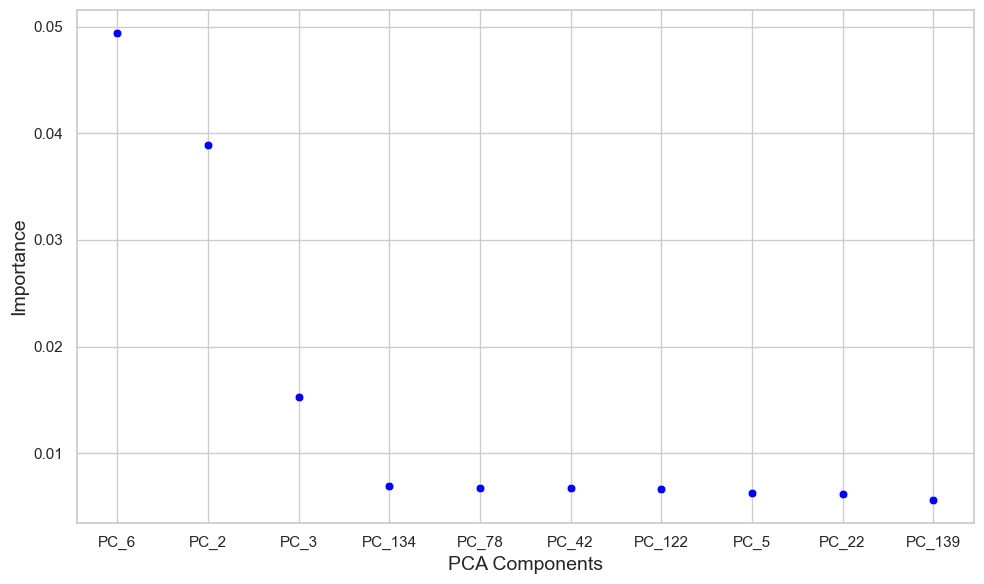

In [842]:
pca_importance_df_1=pca_importance_df.sort_values(by='Importance 0', ascending=False)


sns.set(style="whitegrid")
pca_importance_df_1=pca_importance_df_1[:10]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA_Component', y='Importance 0', data=pca_importance_df_1[['PCA_Component', 'Importance 0']], s=40, color='blue')

plt.xlabel('PCA Components', fontsize=14)
plt.ylabel('Importance', fontsize=14)


# Mostra il grafico
plt.tight_layout()
plt.show()

In [844]:
import pandas as pd
import numpy as np

ordered_indices = [int(component.split('_')[1]) - 1 for component in pca_importance_df_1['PCA_Component']]
ordered_components_df_1 = pca.components_[ordered_indices]
ordered_components_df_1 = pd.DataFrame(ordered_components_df_1, columns=X_dataset_4.columns)
ordered_components_df_1['Importance 1'] = pca_importance_df_1['Importance 0'].values
ordered_components_df_1


,reward_input,sentiment_negative,sentiment_neutral,sentiment_positive,emotion_anger,emotion_joy,emotion_optimism,emotion_sadness,offensive_not-offensive,offensive_offensive,...,bert_759,bert_760,bert_761,bert_762,bert_763,bert_764,bert_765,bert_766,bert_767,Importance 1
0,0.090272,-0.063429,0.083105,-0.047542,-0.026271,-0.020014,0.073328,-0.042573,0.044596,-0.044596,...,-0.002130,0.004966,-0.023200,-0.003394,-0.005107,0.011810,0.002785,-0.000468,0.009658,0.049380
1,-0.129984,-0.015201,0.026845,-0.019293,-0.005236,0.012720,-0.032638,0.029984,0.006388,-0.006388,...,0.014583,0.010403,0.069984,-0.019180,0.005177,0.011603,-0.001925,0.027739,0.031161,0.038940
2,0.031254,0.010422,-0.004383,-0.002760,0.012551,-0.003261,0.004157,-0.012886,-0.004520,0.004520,...,-0.002307,-0.021122,-0.038429,0.012097,-0.003498,-0.008300,0.008415,0.001252,-0.023134,0.015261
3,0.076778,-0.002900,-0.012694,0.016631,0.006695,0.010506,-0.016729,0.001475,-0.006127,0.006127,...,0.004808,0.010566,0.182747,0.003304,-0.003428,0.004165,-0.007479,-0.002040,0.007278,0.006904
4,-0.077020,0.035642,0.042912,-0.075455,0.096908,-0.025317,-0.034542,-0.015002,0.050112,-0.050112,...,-0.004919,0.014326,-0.062291,-0.008631,0.012417,-0.005437,0.007925,-0.010721,0.001775,0.006789
5,0.008315,-0.037872,0.076027,-0.058495,0.061292,0.009973,-0.015158,-0.051104,-0.008784,0.008784,...,-0.028041,-0.005217,-0.084641,0.000088,-0.022212,-0.009941,-0.006913,-0.028250,0.024577,0.006699
6,-0.150980,-0.083265,0.016323,0.043363,0.074728,-0.054342,-0.035466,0.044026,0.007552,-0.007552,...,-0.015893,0.012635,0.038331,0.009954,-0.010693,-0.009940,0.001953,-0.006841,-0.009703,0.006694
7,0.039923,-0.003506,-0.006026,0.009480,-0.001195,0.009892,0.011419,-0.025945,0.000890,-0.000890,...,0.010019,-0.025128,0.095527,-0.010765,0.020507,-0.005104,-0.001773,0.002059,0.009497,0.006250
8,-0.031035,0.012483,-0.056261,0.054855,0.009124,-0.104341,0.052198,0.058504,-0.013958,0.013958,...,-0.001340,-0.007511,-0.041370,0.005291,0.005094,0.002713,0.010569,-0.004129,-0.013365,0.006184
9,0.072134,0.041581,-0.014702,-0.014186,-0.017457,0.023312,0.009036,-0.024780,0.000168,-0.000168,...,0.004860,0.024726,-0.025981,-0.029448,0.014651,0.004098,-0.004631,0.032561,-0.003157,0.005639


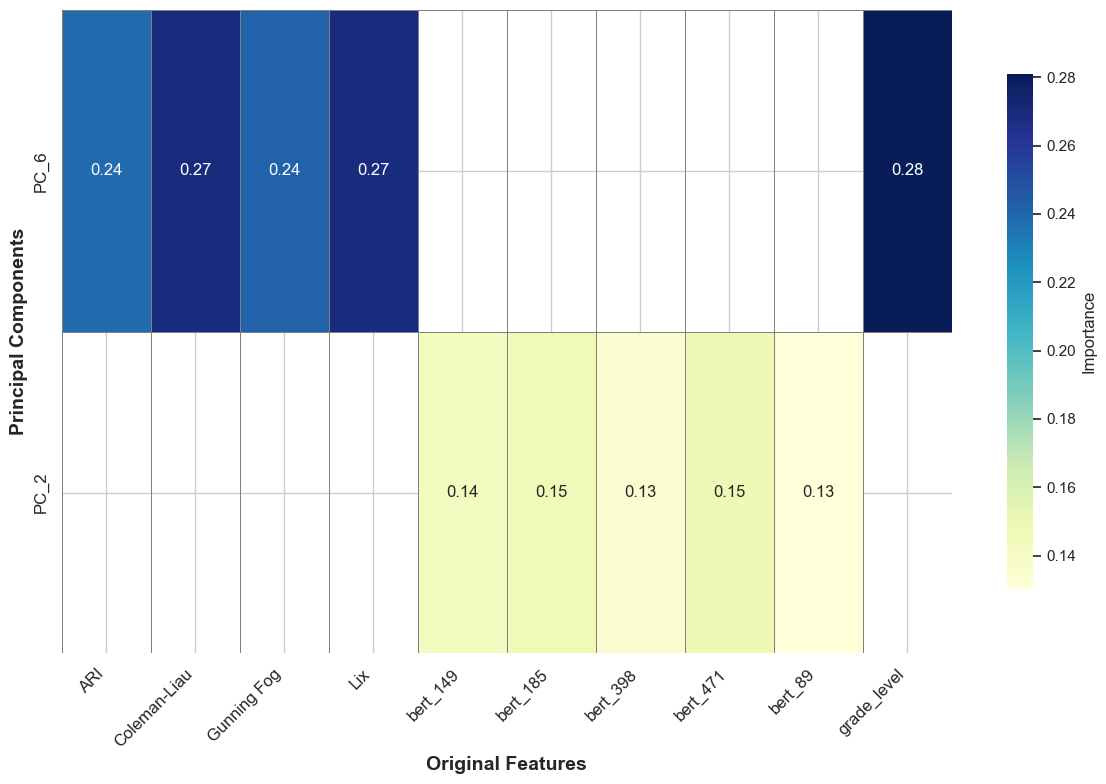

In [836]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_3 = ordered_components_df_1.select_dtypes(include=[np.number])[:2].apply(lambda row: row.nlargest(5), axis=1)
top_3.index = ['PC_6', 'PC_2']

plt.figure(figsize=(12, 8)) 

sns.heatmap(top_3, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True,
            linewidths=0.5, linecolor='gray', annot_kws={"size": 12}, 
            cbar_kws={"shrink": 0.8, 'label': 'Importance'}) 

plt.xlabel("Original Features", fontsize=14, fontweight='bold')
plt.ylabel("Principal Components", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12) 
plt.tight_layout()
plt.show()


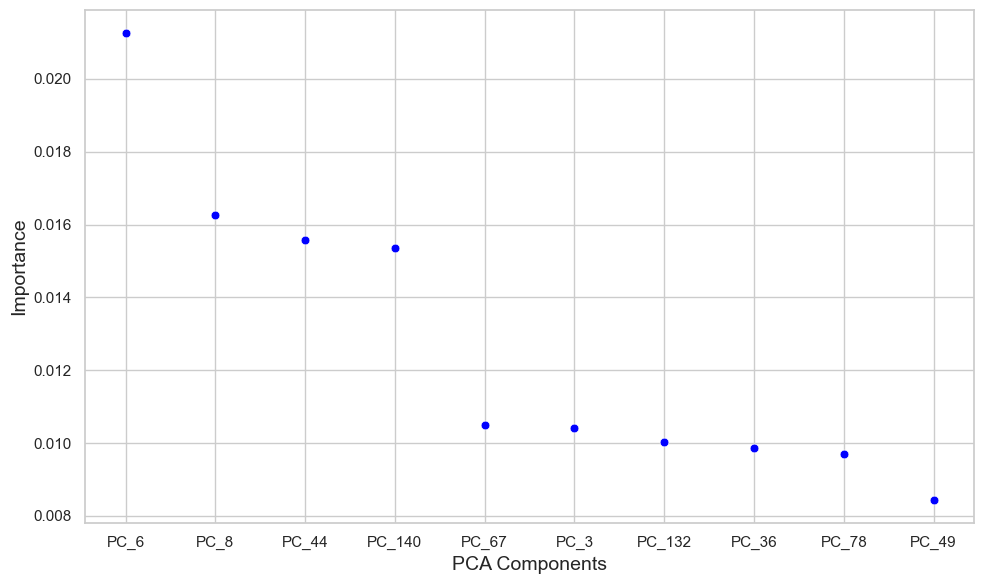

In [837]:
pca_importance_df_1=pca_importance_df.sort_values(by='Importance 1', ascending=False)


sns.set(style="whitegrid")
pca_importance_df_1=pca_importance_df_1[:10]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA_Component', y='Importance 1', data=pca_importance_df_1[['PCA_Component', 'Importance 1']], s=40, color='blue')

plt.xlabel('PCA Components', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.tight_layout()
plt.show()

In [838]:
import pandas as pd
import numpy as np

ordered_indices = [int(component.split('_')[1]) - 1 for component in pca_importance_df_1['PCA_Component']]

ìordered_components_df_1 = pca.components_[ordered_indices]
ordered_components_df_1 = pd.DataFrame(ordered_components_df_1, columns=X_dataset_4.columns)
ordered_components_df_1['Importance 1'] = pca_importance_df_1['Importance 1'].values
ordered_components_df_1


,reward_input,sentiment_negative,sentiment_neutral,sentiment_positive,emotion_anger,emotion_joy,emotion_optimism,emotion_sadness,offensive_not-offensive,offensive_offensive,...,bert_759,bert_760,bert_761,bert_762,bert_763,bert_764,bert_765,bert_766,bert_767,Importance 1
0,0.090272,-0.063429,0.083105,-0.047542,-0.026271,-0.020014,0.073328,-0.042573,0.044596,-0.044596,...,-0.002130,0.004966,-0.023200,-0.003394,-0.005107,0.011810,0.002785,-0.000468,0.009658,0.021248
1,-0.055435,0.034069,-0.002704,-0.022274,0.019119,-0.005209,-0.076604,0.085613,-0.032336,0.032336,...,0.006289,-0.000269,-0.079685,-0.008253,0.013947,0.008784,0.008501,0.011346,-0.002065,0.016260
2,0.020633,0.017972,0.012063,-0.027131,0.071369,-0.064290,0.036381,-0.031033,0.020854,-0.020854,...,0.026645,0.006425,-0.039112,-0.009037,-0.003652,0.000275,0.003738,-0.011412,0.021118,0.015574
3,0.020672,0.068834,-0.022536,-0.025539,-0.045496,0.055701,-0.000418,-0.027810,0.008615,-0.008615,...,0.001609,-0.011220,-0.026974,-0.000988,-0.002340,-0.001395,0.007569,0.016261,0.015727,0.015344
4,0.025602,-0.007793,-0.005311,0.011855,-0.024419,-0.056713,0.088634,-0.016858,-0.005930,0.005930,...,0.012473,-0.003328,-0.035779,0.003869,-0.003260,0.008581,0.000474,-0.001858,0.014038,0.010490
5,0.031254,0.010422,-0.004383,-0.002760,0.012551,-0.003261,0.004157,-0.012886,-0.004520,0.004520,...,-0.002307,-0.021122,-0.038429,0.012097,-0.003498,-0.008300,0.008415,0.001252,-0.023134,0.010426
6,0.020973,-0.040752,0.012328,0.016276,0.032684,-0.009996,-0.043791,0.037467,0.009980,-0.009980,...,-0.005292,-0.001861,0.002440,-0.016521,0.003497,-0.012836,-0.003497,0.011675,0.006109,0.010037
7,-0.096207,-0.009653,-0.082218,0.100925,-0.051760,-0.186838,0.235100,-0.010487,-0.019669,0.019669,...,-0.013166,0.000911,-0.068003,-0.014622,-0.016397,-0.010621,-0.002830,-0.035477,0.005041,0.009866
8,-0.077020,0.035642,0.042912,-0.075455,0.096908,-0.025317,-0.034542,-0.015002,0.050112,-0.050112,...,-0.004919,0.014326,-0.062291,-0.008631,0.012417,-0.005437,0.007925,-0.010721,0.001775,0.009688
9,0.031374,-0.058084,0.015538,0.025516,0.055745,-0.039063,0.031573,-0.042461,-0.019818,0.019818,...,-0.002200,0.004242,0.011038,-0.001548,-0.029942,-0.000556,-0.001422,0.020014,-0.009200,0.008444


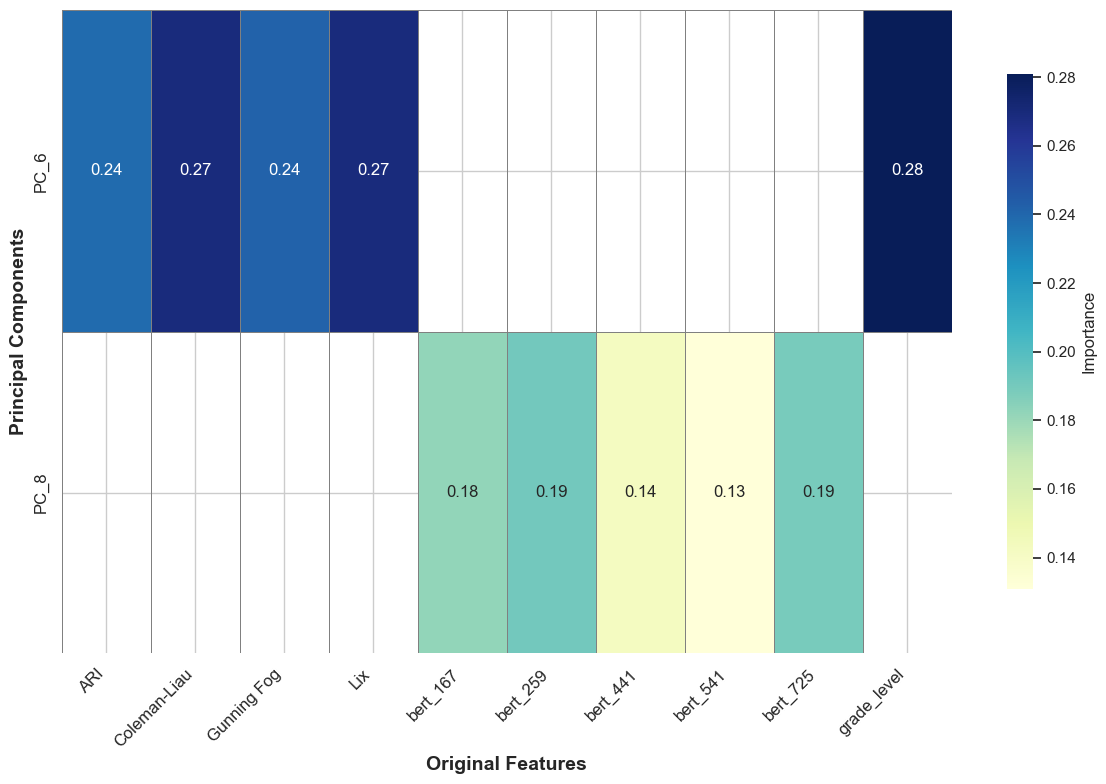

In [840]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_3 = ordered_components_df_1.select_dtypes(include=[np.number])[:2].apply(lambda row: row.nlargest(5), axis=1)
top_3.index = ['PC_6', 'PC_8']

plt.figure(figsize=(12, 8))  

sns.heatmap(top_3, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True,
            linewidths=0.5, linecolor='gray', annot_kws={"size": 12}, 
            cbar_kws={"shrink": 0.8, 'label': 'Importance'})  

plt.xlabel("Original Features", fontsize=14, fontweight='bold')
plt.ylabel("Principal Components", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12) 
plt.tight_layout()
plt.show()


# Model on Post Reward data

In [3]:
post_total_data= pd.read_csv('insert path')   #'c:\\Users\\aless\\Downloads\\data_post_reward_x_final_classification.csv'
post_total_data

,Unnamed: 0,Up-Down,Num_Comments,Media,flair_adoption,flair_announcement,flair_comedy,flair_dapp,flair_discussion,flair_educational,...,bert_758,bert_759,bert_760,bert_761,bert_762,bert_763,bert_764,bert_765,bert_766,bert_767
0,0,2,6,0,0,0,0,0,0,0,...,-2.1102,0.69660,0.32780,0.148700,1.9013,-1.21450,0.083700,-0.70660,1.03970,0.70790
1,1,1,8,0,0,0,0,0,0,0,...,-2.0213,0.55942,0.14586,0.059950,1.9020,-0.88164,-0.091699,-0.55292,0.70170,1.12980
2,2,5,8,1,0,0,0,0,0,0,...,-2.0739,0.76920,0.66532,0.111300,2.0999,-1.16340,0.064000,-0.65240,0.97220,1.06120
3,3,124,21,1,0,0,0,0,0,0,...,-2.0176,0.94402,0.41523,0.256580,1.9387,-0.93738,-0.049934,-0.42100,0.89963,0.98649
4,4,20,4,0,0,0,1,0,0,0,...,-1.5878,0.68683,0.18753,0.059817,2.0965,-0.95004,0.421650,-0.78431,0.63633,0.89736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248315,13259,1,0,0,0,0,0,0,0,0,...,-1.9638,1.14360,2.58440,0.092437,2.0163,-0.90838,0.326670,-0.68376,0.51854,1.16360
248316,13260,1,0,0,0,0,0,0,0,0,...,-2.0271,0.77190,2.84336,0.286800,1.9576,-1.09590,0.138900,-0.68030,0.95610,1.00070
248317,13261,1,4,0,0,0,0,0,0,0,...,-2.0141,0.68621,3.12756,0.157220,1.7806,-0.99189,0.080964,-0.35149,0.71987,1.22440
248318,13262,1,0,0,0,0,0,0,0,0,...,-2.1588,0.89868,2.71220,0.039124,1.8470,-0.96300,0.001657,-0.54827,0.96191,1.03810


In [817]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

def apply_pca_with_fixed_components(X, n_components=166):
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X)  

    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    return X_pca, pca, n_components, cumulative_variance


datasets = {
    'Feature + BERT Expanded': pre_total_data,
}

pca_results = {}
transformed_datasets = {}

for dataset_name, X in datasets.items():
    print(f"\n### Applying PCA on Dataset: {dataset_name} ###")
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_pca, pca, n_components, cumulative_variance = apply_pca_with_fixed_components(X_scaled)    
    pca_results[dataset_name] = {
        'X_pca': X_pca,
        'explained_variance_ratio': pca.explained_variance_ratio_[:n_components],
        'n_components': n_components,
        'original_features': X.shape[1],
        'cumulative_variance': cumulative_variance
    }
    
    transformed_datasets[dataset_name] = pd.DataFrame(X_pca, columns=[f"PC_{i+1}" for i in range(n_components)])
    
    print(f"Original number of features: {pca_results[dataset_name]['original_features']}")
    print(f"Number of components after PCA: {pca_results[dataset_name]['n_components']}")
    print(f"Explained variance ratio: {pca_results[dataset_name]['explained_variance_ratio']}")
    print(f"Cumulative explained variance: {pca_results[dataset_name]['cumulative_variance']}")




### Applying PCA on Dataset: Feature + BERT Expanded ###
Original number of features: 819
Number of components after PCA: 166
Explained variance ratio: [0.13042973 0.04865469 0.03171391 0.03001588 0.02400426 0.02251049
 0.02042788 0.01937255 0.01721298 0.01590249 0.01411537 0.01279381
 0.01261117 0.01222047 0.01177339 0.01145404 0.0107726  0.01026188
 0.00995859 0.00989431 0.00931223 0.00912427 0.00860933 0.00845887
 0.00823433 0.00815982 0.00795816 0.00768136 0.00732841 0.00708572
 0.00678926 0.00655202 0.00638927 0.00607597 0.00604964 0.00583422
 0.00574779 0.00547723 0.00529437 0.00521997 0.00517761 0.00502587
 0.00496382 0.00474022 0.00473715 0.00465683 0.00442753 0.00433597
 0.00427797 0.00419874 0.00412328 0.0040429  0.00398181 0.00395108
 0.00385172 0.00376437 0.00368565 0.00364961 0.00354023 0.00347478
 0.0033871  0.00331121 0.00325823 0.00320956 0.00315104 0.00310462
 0.00308837 0.0030264  0.0029067  0.00287388 0.00284332 0.00280337
 0.00277702 0.00272731 0.00269526 0.0026125

In [818]:

y_new_pred = model_the_best.predict(transformed_datasets['Feature + BERT Expanded'])

print("Predictions on new data:", y_new_pred)


y_new_pred = np.array(y_new_pred)

positive_count = np.sum(y_new_pred == 1)  
negative_count = np.sum(y_new_pred == 0)  

total_predictions = len(y_new_pred)

positive_proportion = positive_count / total_predictions
negative_proportion = negative_count / total_predictions

print(f'Positive Predictions: {positive_count} ({positive_proportion:.2%})')
print(f'Negative Predictions: {negative_count} ({negative_proportion:.2%})')


c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Predictions on new data: [0. 0. 0. ... 1. 0. 0.]
Positive Predictions: 41054 (16.53%)
Negative Predictions: 207266 (83.47%)


# Model on pre reward data

In [4]:
pre_total_data= pd.read_csv('insert path')   #'c:\\Users\\aless\\Downloads\\data_pre_reward_x_final_classification.csv'
pre_total_data 

,Unnamed: 0,Up-Down,Num_Comments,Media,flair_adoption,flair_altcoin,flair_announcement,flair_comedy,flair_dapp,flair_discussion,...,bert_758,bert_759,bert_760,bert_761,bert_762,bert_763,bert_764,bert_765,bert_766,bert_767
0,0,10,9,0,0,0,0,0,0,0,...,-2.4693,-0.71732,-1.11810,1.05830,-1.3588,0.388220,-2.0808,-0.84124,-0.498630,-0.78077
1,1,12,27,0,0,0,0,0,0,0,...,-2.4375,-0.33521,-0.98417,0.60537,-1.3027,-0.005083,-1.9859,-0.75455,-0.063954,-0.88743
2,2,5,7,0,0,0,0,0,0,0,...,-2.7170,-0.36867,-0.92320,0.87915,-1.3446,-0.109510,-1.7503,-0.49715,-0.507740,-0.85654
3,3,3,2,0,0,0,0,0,0,0,...,-2.2256,-0.58304,-1.04297,0.90395,-1.0266,0.095971,-1.8184,-0.52708,-0.474220,-0.35750
4,4,9,11,0,0,0,0,0,0,0,...,-2.4307,-0.48110,-0.73013,0.77413,-1.0524,-0.086142,-1.8239,-0.80496,-0.171310,-0.37328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65690,1690,2,2,0,0,0,0,0,0,0,...,-2.6319,-0.45458,-0.37450,0.79077,-1.3192,0.251540,-1.4710,-0.75592,-0.331730,-0.46270
65691,1691,16,23,0,0,0,0,0,0,0,...,-2.6900,-0.56871,-0.51279,0.96698,-1.6035,0.041926,-1.6938,-0.54013,-0.327800,-1.17990
65692,1692,2,0,0,0,0,0,0,0,0,...,-2.5386,-0.85031,-0.28386,0.90991,-1.3002,0.056882,-1.7130,-0.39817,-0.341450,-0.82690
65693,1693,1,12,0,0,0,0,0,0,0,...,-2.8290,-0.67560,-0.40747,0.89618,-1.1387,0.051005,-1.8844,-0.41055,-0.140060,-0.75554


In [820]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

def apply_pca_with_fixed_components(X, n_components=166):
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X) 
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    return X_pca, pca, n_components, cumulative_variance

datasets = {
    'Feature + BERT Expanded': pre_total_data,
}

pca_results = {}
transformed_datasets = {}
for dataset_name, X in datasets.items():
    print(f"\n### Applying PCA on Dataset: {dataset_name} ###")
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_pca, pca, n_components, cumulative_variance = apply_pca_with_fixed_components(X_scaled)    
    pca_results[dataset_name] = {
        'X_pca': X_pca,
        'explained_variance_ratio': pca.explained_variance_ratio_[:n_components],
        'n_components': n_components,
        'original_features': X.shape[1],
        'cumulative_variance': cumulative_variance
    }
    
    transformed_datasets[dataset_name] = pd.DataFrame(X_pca, columns=[f"PC_{i+1}" for i in range(n_components)])
    
    print(f"Original number of features: {pca_results[dataset_name]['original_features']}")
    print(f"Number of components after PCA: {pca_results[dataset_name]['n_components']}")
    print(f"Explained variance ratio: {pca_results[dataset_name]['explained_variance_ratio']}")
    print(f"Cumulative explained variance: {pca_results[dataset_name]['cumulative_variance']}")

y_new_pred = model_the_best.predict(transformed_datasets['Feature + BERT Expanded'])

print("Predictions on new data:", y_new_pred)

y_new_pred = np.array(y_new_pred)
positive_count = np.sum(y_new_pred == 1)  
negative_count = np.sum(y_new_pred == 0)  
total_predictions = len(y_new_pred)
positive_proportion = positive_count / total_predictions
negative_proportion = negative_count / total_predictions

print(f'Positive Predictions: {positive_count} ({positive_proportion:.2%})')
print(f'Negative Predictions: {negative_count} ({negative_proportion:.2%})')





### Applying PCA on Dataset: Feature + BERT Expanded ###
Original number of features: 819
Number of components after PCA: 166
Explained variance ratio: [0.1700621  0.05125489 0.03849214 0.03256576 0.02731659 0.02481858
 0.02225968 0.01804025 0.01654735 0.01610288 0.01443907 0.01319867
 0.01272219 0.01165199 0.01154941 0.01096388 0.01029965 0.00993272
 0.00914524 0.00891774 0.0085024  0.00812499 0.00776208 0.00757309
 0.00734408 0.00724687 0.00677033 0.00664546 0.00642852 0.00633797
 0.0063055  0.00599143 0.00572109 0.00554207 0.00552984 0.00534846
 0.00524684 0.00508014 0.00497006 0.00481889 0.00476705 0.004602
 0.00436645 0.00429146 0.00423722 0.00414274 0.00397238 0.00390965
 0.00383768 0.00379701 0.00371483 0.00359768 0.0035213  0.00347513
 0.00332501 0.0032568  0.00325525 0.00319772 0.00319539 0.00312455
 0.00301791 0.00292873 0.00289398 0.00288545 0.00277806 0.00276293
 0.0027207  0.0026419  0.00260999 0.00256887 0.00255778 0.00248792
 0.00247555 0.0024164  0.00237777 0.00233585 

c:\Users\Castagna\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Predictions on new data: [0. 0. 0. ... 0. 0. 0.]
Positive Predictions: 16957 (25.81%)
Negative Predictions: 48738 (74.19%)


# Difference on content quality pre and post reward system

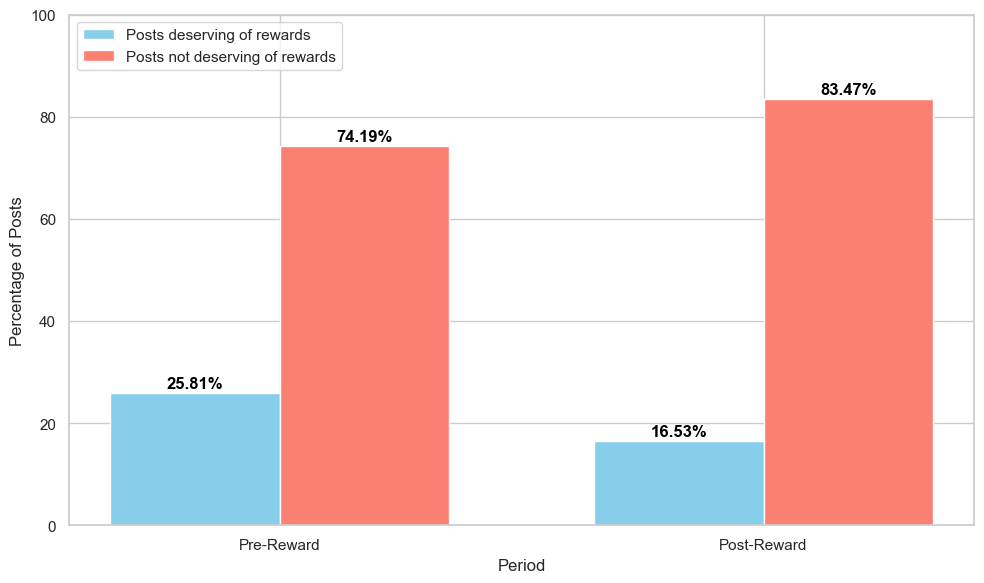

In [821]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['Pre-Reward', 'Post-Reward']
positive_predictions = [25.81, 16.53]  
negative_predictions = [74.19, 83.47]  

bar_width = 0.35
index = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(10, 6))  

bar1 = ax.bar(index, positive_predictions, bar_width, label='Posts deserving of rewards', color='skyblue')
bar2 = ax.bar(index + bar_width, negative_predictions, bar_width, label='Posts not deserving of rewards', color='salmon')

for i in range(len(positive_predictions)):
    ax.text(i, positive_predictions[i] + 1, f'{positive_predictions[i]}%', ha='center', color='black', fontweight='bold')
    ax.text(i + bar_width, negative_predictions[i] + 1, f'{negative_predictions[i]}%', ha='center', color='black', fontweight='bold')

ax.set_xlabel('Period')
ax.set_ylabel('Percentage of Posts')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)
ax.set_ylim(0, 100)
ax.legend(loc='upper left') 
plt.tight_layout()
plt.show()
